## Project : DYNAMIC PRICE PREDICTION OF AIRLINES
#### Problem Statement:
***Develop a machine learning model to predict the airline price using the features provided in the dataset.***
#### Problem Overview:
Airline companies are following the dynamic pricing model. They have fixed number of seats in their plane. They are following the dynamic pricing strategy for selling seats to increase the revenue. The pricing will change based on the demand. The demand is dependent on many factors such as holiday, peak time, short/long route, number of stops, economy class etc,. Airlines have to model the demand, so that they can sell all the seats with more profit. Modelling the demand is critical because poor modelling may leave more seat empty or lead to less revenue. 
<br>
<br>The objective of this project is to model the airline price change using the different features.  This predictive model will help the passenger to make purchasing decisions by predicting how air ticket prices will evolve in the future.
<br>
<br>The following three files will b

e provided to work on this project

1. Train data : TRAIN.xlxs
2. Test data: TEST.xlxs
3. Submission data format: OUT_SAMPLE.xlsx

9000 observations are used for training and 1683 data is provided for testing the model. This dataset contains 10 following independent features to train a predictor (Price).
    
   1. **Airline:** The name of the airline.
   2. **Date_of_Journey:** The Date_of_Journey of the journey
   3. **Source:** The source from which the service begins.
   4. **Destination:** The destination where the service ends.
   5. **Route:** The route taken by the flight to reach the destination.
   6. **Dep_Time:** The time when the journey starts from the source.
   7. **Arrival_Time:** Time of arrival at the destination.
   8. **Duration:** Total duration of the flight.
   9. **Stops:** Total stops between the source and destination.
   10. **Extra_Info:** Additional_Information about the flight

In [1]:
#libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import requests
pd.options.display.float_format = '{:20,.2f}'.format

## Data and Description

In [2]:
#read data and get basic info
data = pd.read_excel('Data_Train.xlsx')
data.head()
data.info()
#data description
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,"10,683.00"
unique,12,44,5,6,128,222,1343,368,5,10,nan
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,nan
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,087.06"
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,611.36"
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,759.00"
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,277.00"
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,372.00"
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"12,373.00"


In [3]:
test = pd.read_excel('Test_set.xlsx')
test.info()
test.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [4]:
#as only 2 fill NaN using mode
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])
data['Route'] = data['Route'].fillna(data['Route'].mode()[0])

## EDA
#### Perform EDA and Feature Engineering:
Exploratory Data Analysis and Visualizations need to perform on the input features, to understand the characteristics of data. One can also think of extracting/deriving few more features from the data. Also, at the same time, the unwanted features can be dropped.  Proper pre-processing (treating NaN, cleaning, structuring, scaling/normalizing) will lead to better prediction.  Statistical testing and correlation analysis will help to understand the significance of feature sets. 


## Data Cleaning
checking for unique values in categorical columns to identify issues with data representation, Typos etc.,

In [5]:
#unique values for categorical columns
def uniq_cat(df):
    print(df['Additional_Info'].unique())
    print(df['Route'].nunique())
    print(df['Source'].unique())
    print(df['Destination'].unique())
    print(df['Airline'].unique())
    print(df['Total_Stops'].unique())
    return("*******")
print('TRAIN')
print(uniq_cat(data))
print('TEST')
print(uniq_cat(test))


TRAIN
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
128
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
*******
TEST
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Business class' 'Change airports']
100
['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
[

In [6]:
# '''Additional_Info like 'Flight class', baggage info, meal info will have impact on price however in this data we have many rows without info 

data['Additional_Info'] = data['Additional_Info'].replace({'No info':'No Info'})
test['Additional_Info'] = test['Additional_Info'].replace({'No info':'No Info'})

#'''

In [7]:
#remove spaces from routemap and count unique 
data['Route'].str.replace(" ","").nunique()
test['Route'].str.replace(" ","").nunique()

128

100

In [8]:
#replace New Delhi to Delhi in Destinations as they are same (Delhi has 1 airport for domestic and international flights IGI) 
#In current data set IATA code DEL is used for both New Delhi and Delhi
data['Destination']=data['Destination'].replace({'New Delhi':'Delhi'})
data['Destination'].unique()
test['Destination']=test['Destination'].replace({'New Delhi':'Delhi'})
test['Destination'].unique()
data['Source']=data['Source'].replace({'New Delhi':'Delhi'})
data['Source'].unique()
test['Source']=test['Source'].replace({'New Delhi':'Delhi'})
test['Source'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

array(['Cochin', 'Banglore', 'Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [9]:
#data[(data['Source'] == 'Mumbai')&(data['Destination'] ==  'Hyderabad')] 
data[(data['Route']== 'BOM → GOI → PNQ → HYD')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3821,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,21:10,16:55,4h 15m,2 stops,No Info,16172
5309,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,21:10,16:55,4h 15m,2 stops,No Info,17327
5942,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,05:05,16:55,11h 50m,2 stops,No Info,16172
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No Info,17327
7456,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,05:05,16:55,11h 50m,2 stops,No Info,16697
8478,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,13:30,16:55,3h 25m,2 stops,No Info,18797


In [10]:
#data['Duration']=data['Duration'].replace('5m','11h 50m')
#data.['Dep_Time']=data['Dep_Time'].replace('16:50','05:05')
#Duration cannot be 5m
#data=data.drop(6474).reset_index()
data.iloc[6474]
data.iloc[6474, [7]]='11h 50m'
data.iloc[6474, [5]]='05:05'
data.iloc[6474]

Airline                        Air India
Date_of_Journey                6/03/2019
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
Dep_Time                           16:50
Arrival_Time                       16:55
Duration                              5m
Total_Stops                      2 stops
Additional_Info                  No Info
Price                              17327
Name: 6474, dtype: object

Airline                        Air India
Date_of_Journey                6/03/2019
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
Dep_Time                           05:05
Arrival_Time                       16:55
Duration                         11h 50m
Total_Stops                      2 stops
Additional_Info                  No Info
Price                              17327
Name: 6474, dtype: object

In [11]:
test.iloc[2660,[7]]='11h 50m'
test.iloc[2660,[5]]='05:05'

 #### Flight count
Number of flights between source and destination on that particular day. 
 Flight count may have impact on price due to availability of multiple options and competitive pricing by different airlines.
This information can also be indicator of peak season

1. Columns 'Route','Airline','Date_of_Journey','Dep_Time' uniquely identify a flight
2. Counting instances of 'Date_of_Journey','Source','Destination' will give number of flights for that particualr day
3. For counting number of flights one test data also should be used as it may contain a different flight which is not represented in train set 




In [12]:
#create dummy column to identify day, source and dest uniquely
data['dummy']=data['Date_of_Journey']+','+data['Source']+','+data['Destination']
test['dummy']=test['Date_of_Journey']+','+test['Source']+','+test['Destination']#joined columns c

#Create temp df with required field to calculate number of flights
temp = data[['Route','Airline','Date_of_Journey','Dep_Time','Source','Destination','dummy']].append(
    test[['Route','Airline','Date_of_Journey','Dep_Time','Source','Destination','dummy']],ignore_index=True).reset_index()
temp.shape
temp.head(2)

#flight counts
fc=temp.drop_duplicates(subset=['Date_of_Journey','Airline','Route','Dep_Time'],keep='first').groupby(['dummy'])['Route'].count().reset_index().rename(columns={'Route':'Flight count'})
fc.shape

#merge with train and test data
data=pd.merge(data,fc,on='dummy',how='left').drop('dummy',1)
test=pd.merge(test,fc,on='dummy',how='left').drop('dummy',1)
data.shape
data.head(2)
test.shape
test.head(2)

(13354, 8)

,index,Route,Airline,Date_of_Journey,Dep_Time,Source,Destination,dummy
0,0,BLR → DEL,IndiGo,24/03/2019,22:20,Banglore,Delhi,"24/03/2019,Banglore,Delhi"
1,1,CCU → IXR → BBI → BLR,Air India,1/05/2019,05:50,Kolkata,Banglore,"1/05/2019,Kolkata,Banglore"


(178, 2)

(10683, 12)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight count
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,78


(2671, 11)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Flight count
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No Info,146
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No Info,78


#### flight distance

In [13]:
#******** FOR web scraping distance from routemap
#uncomment below block to run********
'''
#function to send weblink API request using IATA code to retrieve data
def fdistance(sa,da):
    url="https://www.prokerala.com/travel/airports/distance/from-"+sa+"/to-"+da+"/"
    response = requests.request("GET", url) 
    txt=response.text           
    s=re.search(r'<h2>\d{1,9}',txt).span()[0]+4
    e=s+ 25
    #print(txt[s:e])
    return(txt[s:e].split(' ')[3])
#desired outputline
#<h2>518.62 miles / 834.63 km is the distance From Chhatrapati Shivaji International Airport To Bengaluru International Airport </h2>

def code_pair(x):
    for i,rmap in enumerate(x):
        ls=rmap.split(' → ')
        for f, s in zip(ls, ls[1:]):
            if ((f,s) not in pairs) and ((s,f) not in pairs):
                pairs.append((f,s))
                dist.append(fdistance(f.lower(),s.lower()))
                source.append(f)
                dest.append(s)
    return (len(pairs))

pairs=[]
dist=[]
source=[]
dest=[]
print('completed retrival. total pairs =',code_pair(data['Route']))
print('completed retrival. total pairs =',code_pair(test['Route']))#.astype(str))) #it doesnt change number of pairs

dist_data = pd.DataFrame(zip(source,dest,dist),columns=["Source","Dest","Distance(Km)"])
dist_data['Distance(Km)']=dist_data['Distance(Km)'].astype(float)
dist_data.to_csv('air_distance.csv')#writefile and keep for future use


#'''

#load distance from presaved file 
#************* *uncomment below line***********
dist_data=pd.read_csv('air_distance.csv')
#create dictionary of distance
distance={}
for row in dist_data.itertuples(index=False):
    distance[(row[1],row[2])]=row[3]





'\n#function to send weblink API request using IATA code to retrieve data\ndef fdistance(sa,da):\n    url="https://www.prokerala.com/travel/airports/distance/from-"+sa+"/to-"+da+"/"\n    response = requests.request("GET", url) \n    txt=response.text           \n    s=re.search(r\'<h2>\\d{1,9}\',txt).span()[0]+4\n    e=s+ 25\n    #print(txt[s:e])\n    return(txt[s:e].split(\' \')[3])\n#desired outputline\n#<h2>518.62 miles / 834.63 km is the distance From Chhatrapati Shivaji International Airport To Bengaluru International Airport </h2>\n\ndef code_pair(x):\n    for i,rmap in enumerate(x):\n        ls=rmap.split(\' → \')\n        for f, s in zip(ls, ls[1:]):\n            if ((f,s) not in pairs) and ((s,f) not in pairs):\n                pairs.append((f,s))\n                dist.append(fdistance(f.lower(),s.lower()))\n                source.append(f)\n                dest.append(s)\n    return (len(pairs))\n\npairs=[]\ndist=[]\nsource=[]\ndest=[]\nprint(\'completed retrival. total pairs

In [14]:
#module to add flight distance to the train/test data
#
#'''
def add_dist_col(rmap):
    ds=0
    ls=rmap.split(' → ')
    for f, s in zip(ls, ls[1:]):
        if (f,s) in distance.keys():
            ds=ds+float(distance[(f,s)])
        else:
            ds=ds+float(distance[(s,f)])
    return(ds)
data['Flight Distance(km)']=data['Route'].apply(add_dist_col)
#add flight distance to test data as well
test['Flight Distance(km)']=test['Route'].apply(add_dist_col)

#'''

In [15]:
# convert Jurney time to numeric column hrs ex 2 hr 30m to 150 minutes
def duration (x):
    y=[]
    for i,t in enumerate(x):
        
        (h,mi)=t.split('h')
        if  mi:
            mi=mi.strip(' ')
            mi=mi.replace('m','')
        
            d=round(float(h)*60 +float(mi))
        else:
            d=float(h)
        #print(i,d)
        y.append(d)
    return(y)

data['Duration']=duration(data['Duration'])
data.head(2)
#same operation on test data
test['Duration']=duration(test['Duration'])
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight count,Flight Distance(km)
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,170.00,non-stop,No Info,3897,50,"1,709.71"
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445.00,2 stops,No Info,7662,78,"1,838.55"


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight count,Flight Distance(km)
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,170.00,non-stop,No Info,3897,50,"1,709.71"
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445.00,2 stops,No Info,7662,78,"1,838.55"


In [16]:
#for t in test['Duration'].astype(str):
#    if 'h' not in  t:
#        print(t)#

In [17]:
#process Date_of_Journey info
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey']).dt.date
#data['Year']=pd.to_datetime(data['Date_of_Journey']).dt.year #only 2019 so not required
data['Month']= pd.to_datetime(data['Date_of_Journey']).dt.month
data['Day_name']=pd.to_datetime(data['Date_of_Journey']).dt.day_name()
data['Day']=pd.to_datetime(data['Date_of_Journey']).dt.day
data.head(2)

## Date_of_Journey in test
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey']).dt.date
#data['Year']=pd.to_datetime(data['Date_of_Journey']).dt.year #only 2019 so not required
test['Month']= pd.to_datetime(test['Date_of_Journey']).dt.month
test['Day_name']=pd.to_datetime(test['Date_of_Journey']).dt.day_name()
test['Day']=pd.to_datetime(test['Date_of_Journey']).dt.day
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight count,Flight Distance(km),Month,Day_name,Day
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,170.00,non-stop,No Info,3897,50,"1,709.71",3,Sunday,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445.00,2 stops,No Info,7662,78,"1,838.55",1,Saturday,5


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Flight count,Flight Distance(km),Month,Day_name,Day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655.00,1 stop,No Info,146,"2,201.60",6,Thursday,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4.00,1 stop,No Info,78,"1,654.62",12,Thursday,5


In [18]:
#split Arrival_Time to remove Date_of_Journey and process time
def arr_time(x):
    y=[] 
    z=[]
    for i,t in enumerate(x):
        if len(t)>5:
            (h,d,m)=t.split(' ')
            #print(h,d)
            z.append(h)
            y.append('1') #next day
        else:
            y.append('0')
            z.append(t)
    return(y,z)
(y,z)=arr_time(data['Arrival_Time'])
data['Arrival_Time']=z
data['Arrival Next day']=y
data['Dep_Time']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time']).dt.hour
data.head(2)

#repeat same on test data
(y,z)=arr_time(test['Arrival_Time'])
test['Arrival_Time']=z
test['Arrival Next day']=y
test['Dep_Time']=pd.to_datetime(test['Dep_Time']).dt.hour
test['Arrival_Time']=pd.to_datetime(test['Arrival_Time']).dt.hour
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight count,Flight Distance(km),Month,Day_name,Day,Arrival Next day
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22,1,170.00,non-stop,No Info,3897,50,"1,709.71",3,Sunday,24,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,445.00,2 stops,No Info,7662,78,"1,838.55",1,Saturday,5,0


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Flight count,Flight Distance(km),Month,Day_name,Day,Arrival Next day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17,4,655.00,1 stop,No Info,146,"2,201.60",6,Thursday,6,1
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,6,10,4.00,1 stop,No Info,78,"1,654.62",12,Thursday,5,0


In [19]:
#convert Stops to numeric 
data['Total_Stops']=data['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})
#same operation on test data
test['Total_Stops']=test['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [20]:
#data=data.drop('index',1)
data.columns
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Flight count', 'Flight Distance(km)',
       'Month', 'Day_name', 'Day', 'Arrival Next day'],
      dtype='object')

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Flight count', 'Flight Distance(km)', 'Month',
       'Day_name', 'Day', 'Arrival Next day'],
      dtype='object')

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight count,Flight Distance(km),Month,Day_name,Day,Arrival Next day
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22,1,170.00,0,No Info,3897,50,"1,709.71",3,Sunday,24,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,445.00,2,No Info,7662,78,"1,838.55",1,Saturday,5,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.00,2,No Info,13882,146,"2,671.33",9,Friday,6,1
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18,23,325.00,1,No Info,6218,78,"1,874.71",12,Thursday,5,0
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16,21,285.00,1,No Info,13302,83,"1,743.04",1,Thursday,3,0


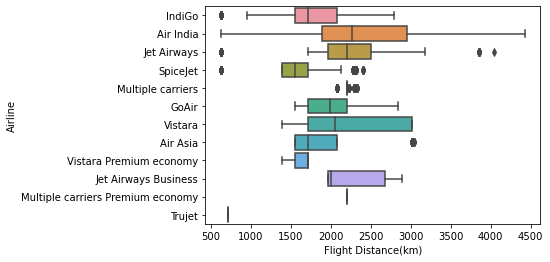

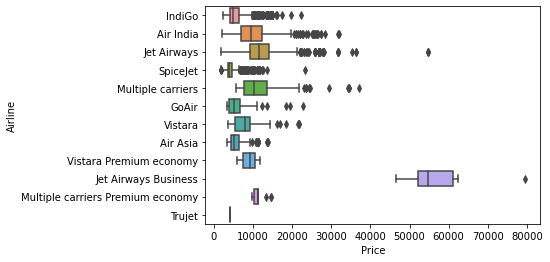

In [22]:
sb.boxplot(data=data,y='Airline',x='Flight Distance(km)')
plt.show()
sb.boxplot(data=data,y='Airline',x='Price')

In [23]:
#verifying instance of price for same flight
#data[(data['Source']== 'Banglore')&(data['Destination']=='Delhi')].sort_values(by='Date_of_Journey').head(20)

In [24]:
#Date_of_Journey and Route can be dropped as features are extracted 
data=data.drop(['Date_of_Journey','Route'],1)
test=test.drop(['Date_of_Journey','Route'],1)

In [25]:

#there is one representation of price per flight looks like its averaged hence divide total flight distance and journey duration by number of stops


data['Duration'] = data['Duration']/(data['Total_Stops']+1)

data['Flight Distance(km)']=data['Flight Distance(km)']/(data['Total_Stops']+1)

test['Duration'] = test['Duration']/(test['Total_Stops']+1)

test['Flight Distance(km)']=test['Flight Distance(km)']/(test['Total_Stops']+1)

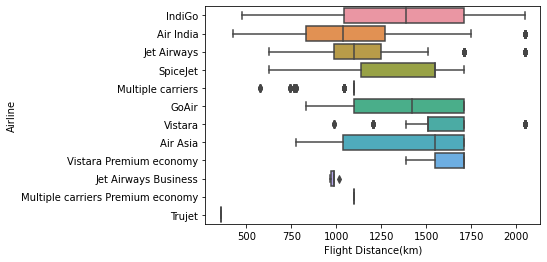

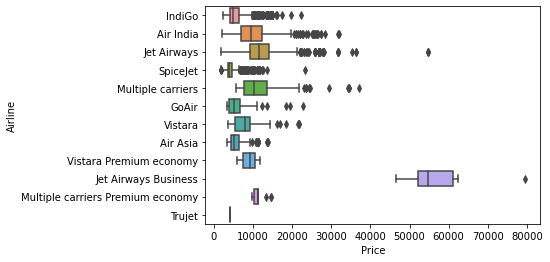

In [26]:
sb.boxplot(data=data,y='Airline',x='Flight Distance(km)')
plt.show()
sb.boxplot(data=data,y='Airline',x='Price')

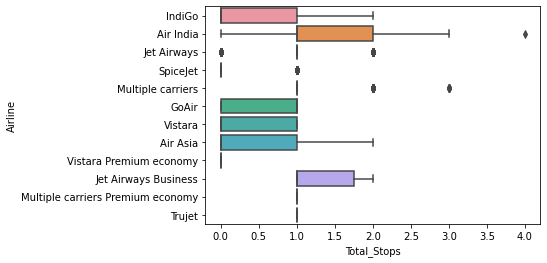

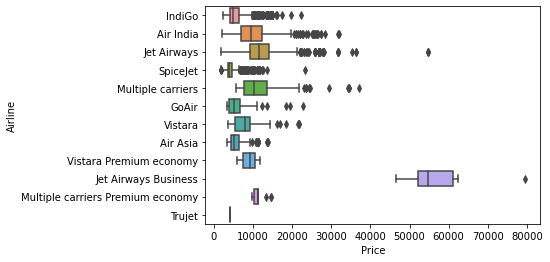

In [27]:
sb.boxplot(data=data,y='Airline',x='Total_Stops')
plt.show()
sb.boxplot(data=data,y='Airline',x='Price')

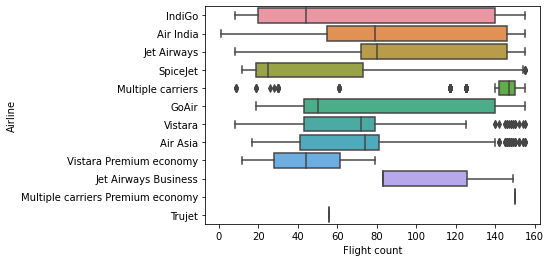

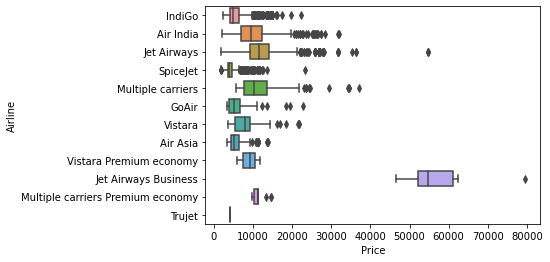

In [28]:
sb.boxplot(data=data,y='Airline',x='Flight count')
plt.show()
sb.boxplot(data=data,y='Airline',x='Price')

### Data visualization and Statistical analysis

In [29]:
#basic statistics of whole train data
data.describe(include='all')


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight count,Flight Distance(km),Month,Day_name,Day,Arrival Next day
count,10683,10683,10683,"10,683.00","10,683.00","10,683.00","10,683.00",10683,"10,683.00","10,683.00","10,683.00","10,683.00",10683,"10,683.00",10683
unique,12,5,5,nan,nan,nan,nan,9,nan,nan,nan,nan,7,nan,2
top,Jet Airways,Delhi,Cochin,nan,nan,nan,nan,No Info,nan,nan,nan,nan,Thursday,nan,0
freq,3849,4537,4537,nan,nan,nan,nan,8348,nan,nan,nan,nan,2290,nan,6348
mean,NaN,NaN,NaN,12.49,13.35,283.99,0.82,NaN,"9,087.06",88.38,"1,209.83",5.53,NaN,12.68,NaN
std,NaN,NaN,NaN,5.75,6.86,207.97,0.68,NaN,"4,611.36",50.29,341.61,2.99,NaN,8.80,NaN
min,NaN,NaN,NaN,0.00,0.00,2.00,0.00,NaN,"1,759.00",1.00,357.48,1.00,NaN,3.00,NaN
25%,NaN,NaN,NaN,8.00,8.00,152.50,0.00,NaN,"5,277.00",43.00,"1,032.49",3.00,NaN,5.00,NaN
50%,NaN,NaN,NaN,11.00,14.00,197.50,1.00,NaN,"8,372.00",79.00,"1,100.80",5.00,NaN,6.00,NaN
75%,NaN,NaN,NaN,18.00,19.00,402.50,1.00,NaN,"12,373.00",146.00,"1,511.34",6.00,NaN,21.00,NaN


,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Flight count,Flight Distance(km),Month,Day
Dep_Time,1.00,0.01,0.03,-0.06,0.01,-0.08,0.08,0.03,-0.00
Arrival_Time,0.01,1.00,0.01,0.04,0.02,0.03,0.01,-0.00,-0.00
Duration,0.03,0.01,1.00,0.43,0.35,0.27,-0.14,0.04,-0.05
Total_Stops,-0.06,0.04,0.43,1.00,0.60,0.62,-0.60,0.07,-0.02
Price,0.01,0.02,0.35,0.60,1.00,0.43,-0.29,0.01,-0.17
Flight count,-0.08,0.03,0.27,0.62,0.43,1.00,-0.33,0.03,0.08
Flight Distance(km),0.08,0.01,-0.14,-0.60,-0.29,-0.33,1.00,-0.01,0.00
Month,0.03,-0.00,0.04,0.07,0.01,0.03,-0.01,1.00,-0.26
Day,-0.00,-0.00,-0.05,-0.02,-0.17,0.08,0.00,-0.26,1.00


<Figure size 1800x1200 with 0 Axes>

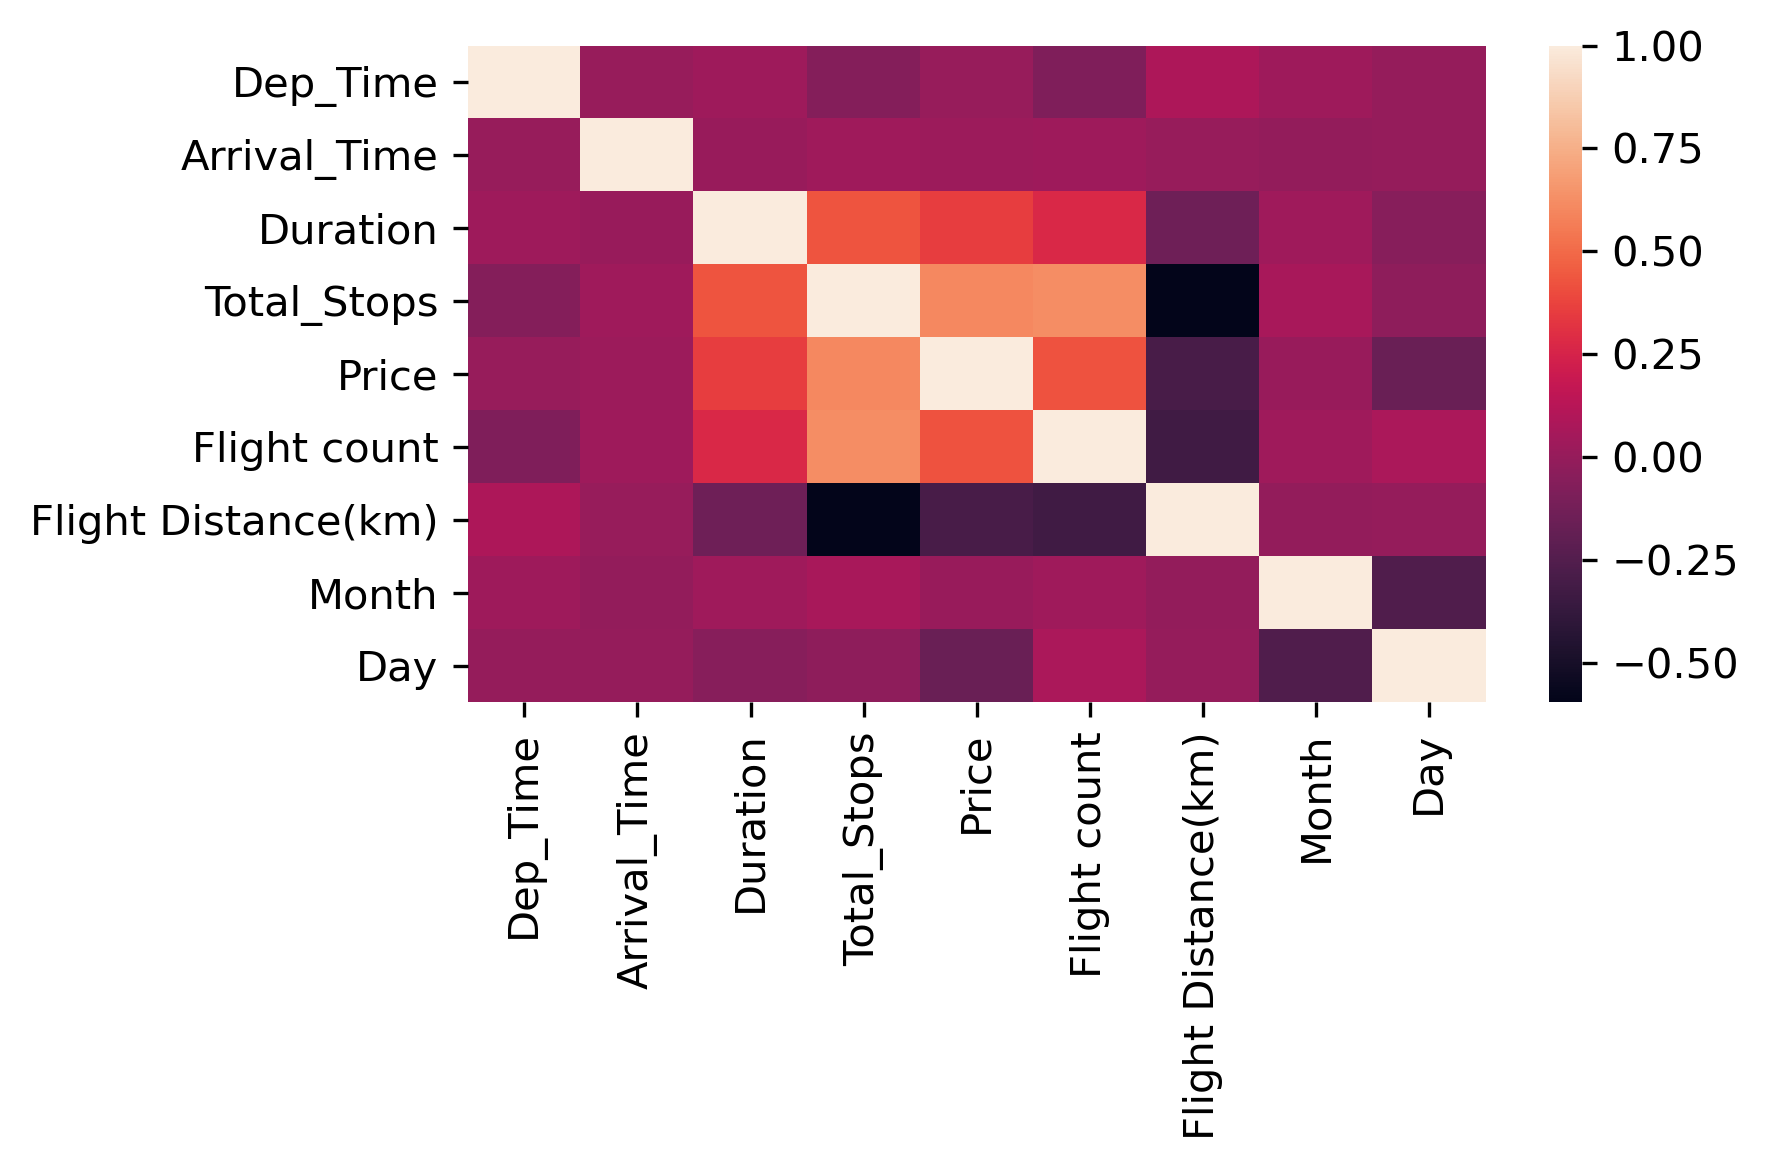

In [30]:
# Pairwise Correlation in data
#Except Duration, number of stops (discrete numeric )and price all other columns are categorical in nature.

cor= data.corr()
cor
plt.figure(dpi=300)
sb.heatmap(data.corr(),annot=False)
plt.tight_layout()
plt.savefig('correlation.png')

 Above plot shows there is correlation between Duration, number of stops, Flight count and flight distance and ticket price.

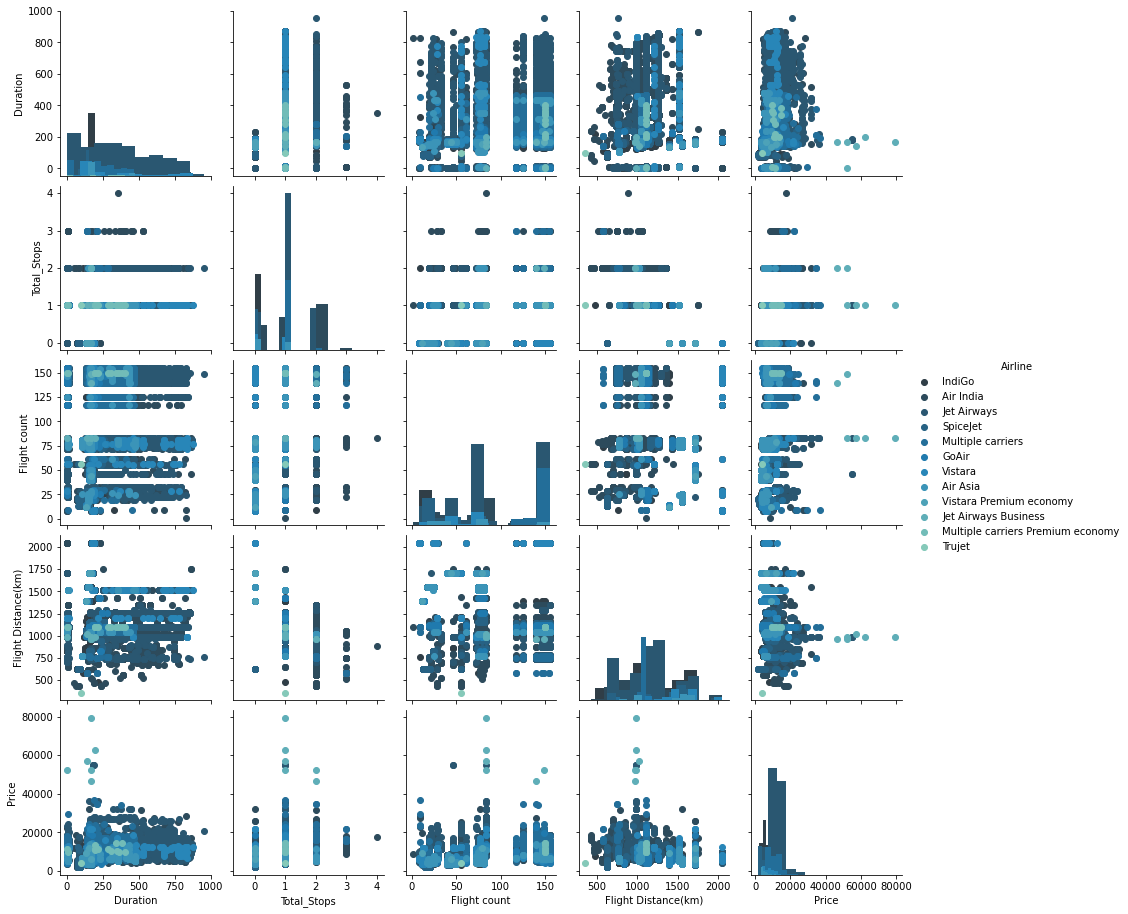

In [31]:
#distribution of numeric values
g = sb.PairGrid(data[['Duration','Total_Stops','Flight count','Flight Distance(km)','Price','Airline']],hue="Airline", palette="YlGnBu_d")

g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)
g.add_legend();

<Figure size 2400x1800 with 0 Axes>

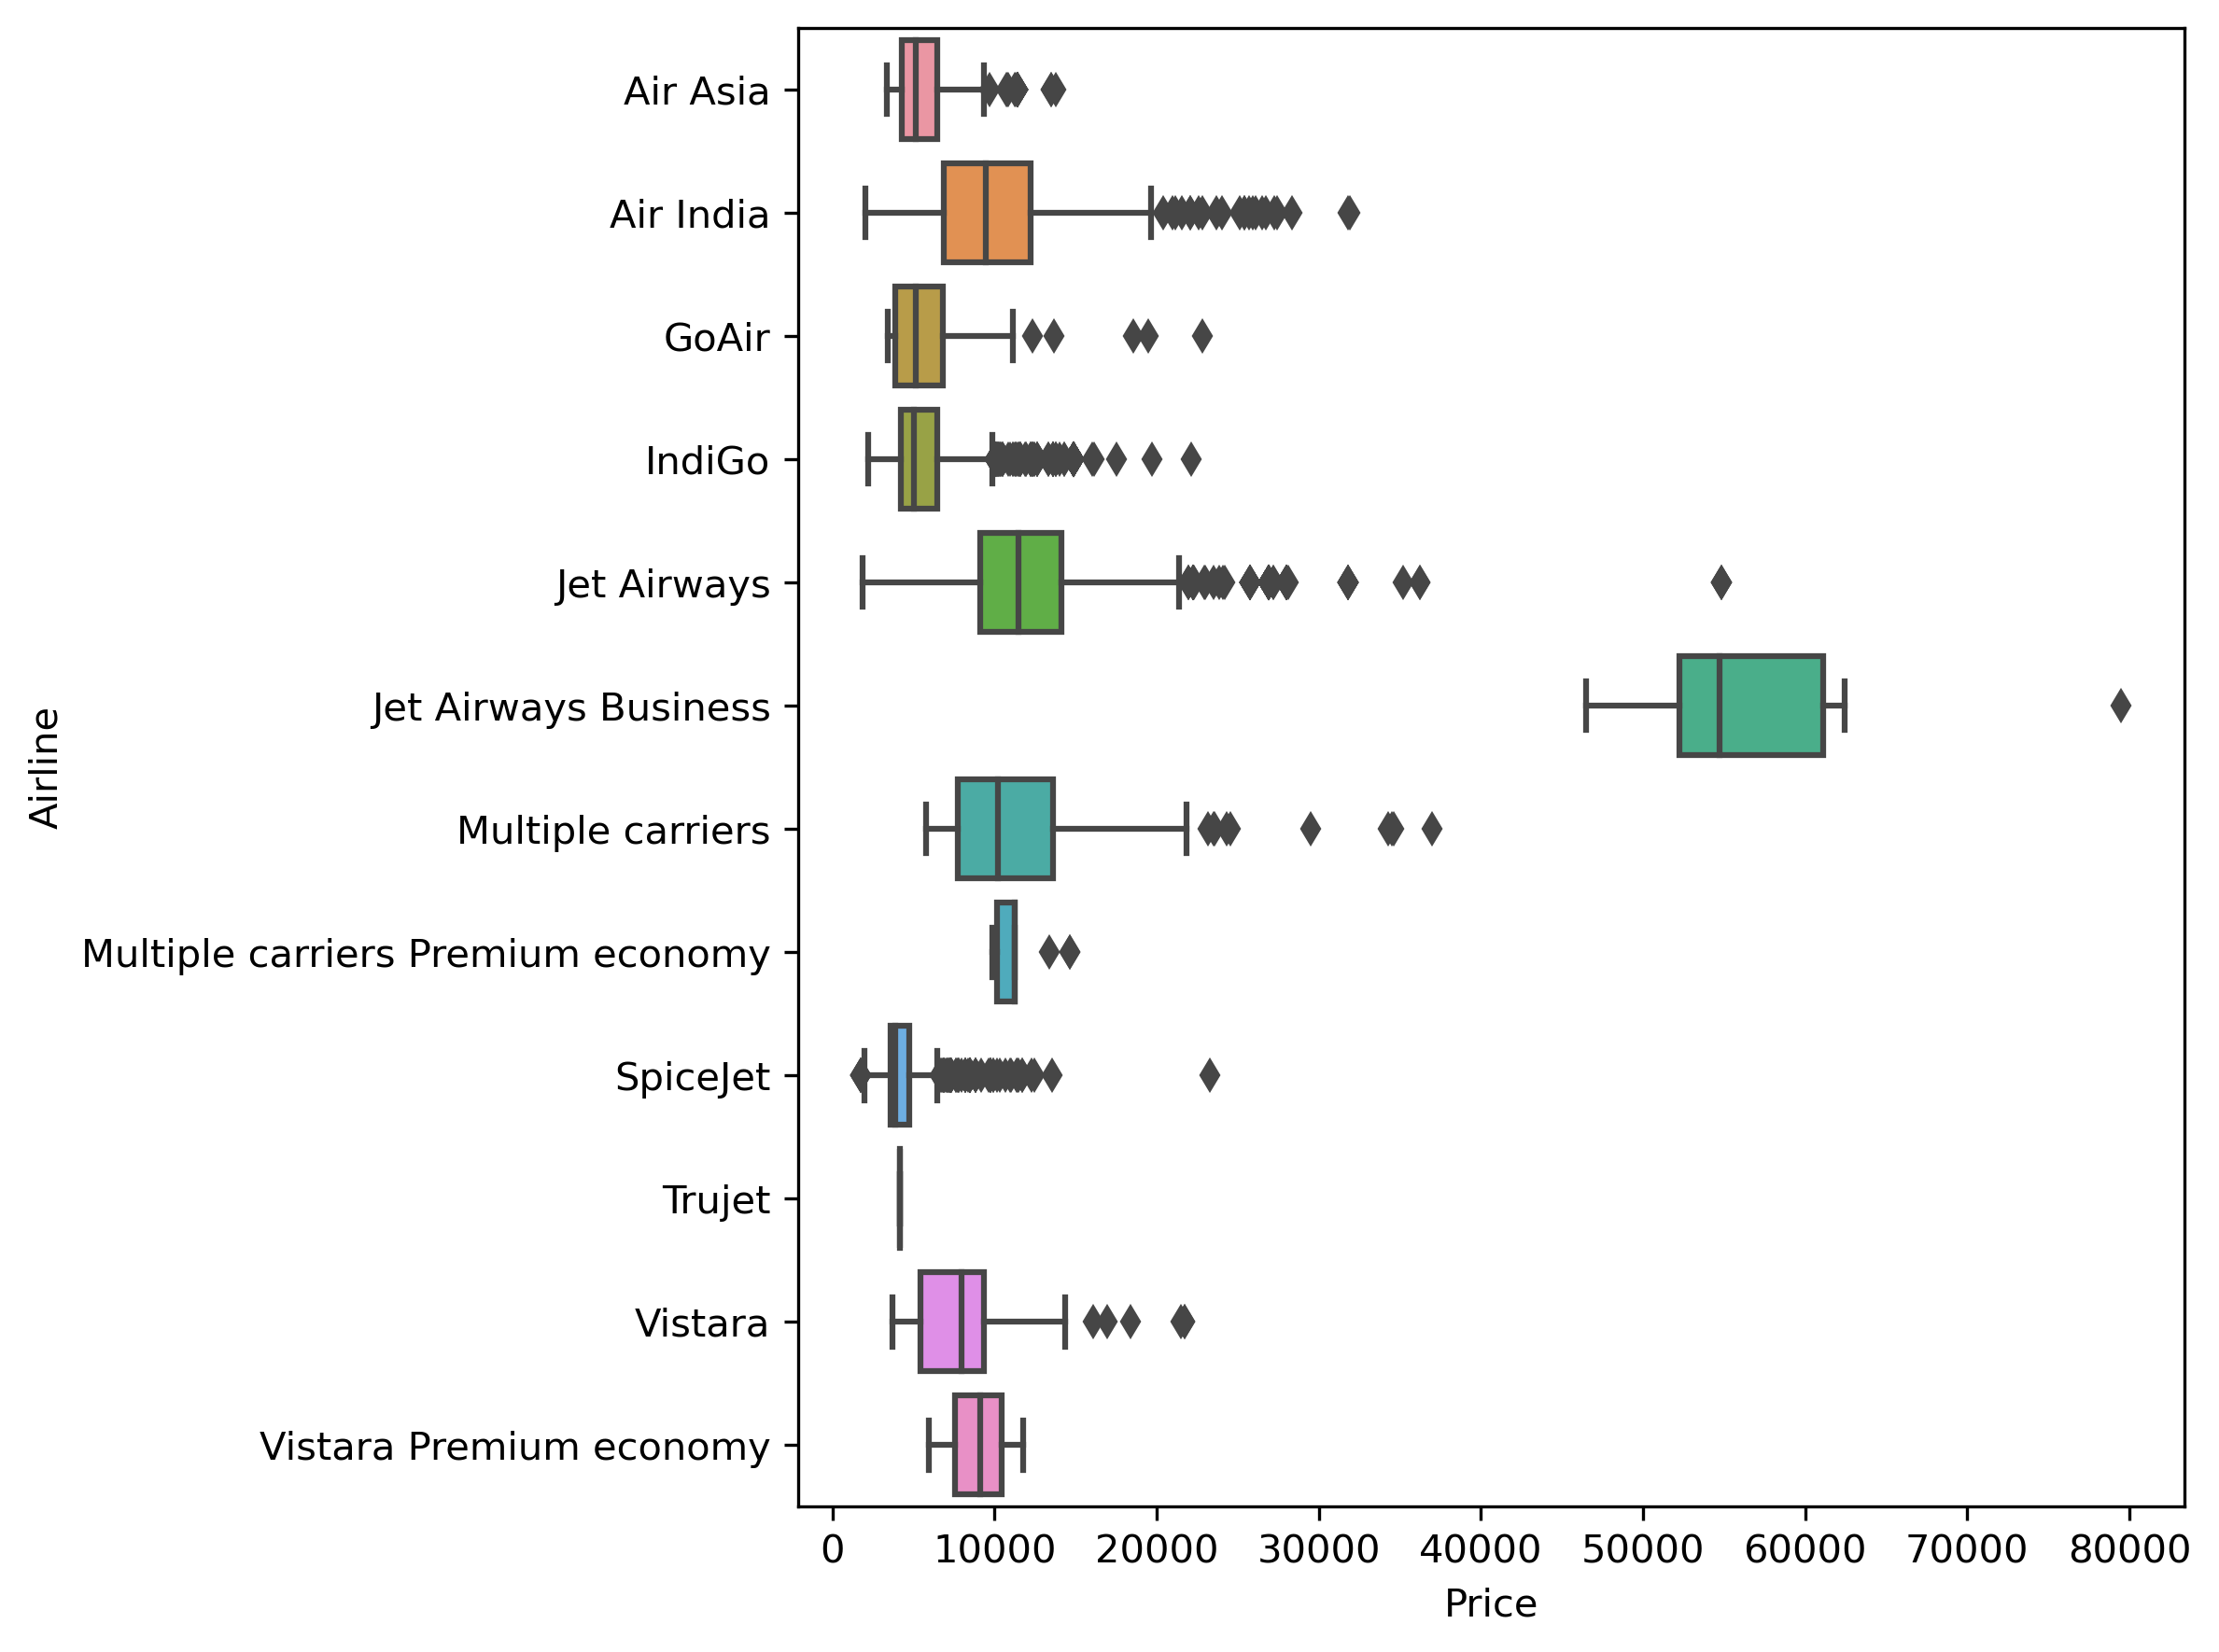

In [32]:
#how are ticket prices distributed for different airlines?
plt.figure(figsize=(8,6),dpi=300)
sb.boxplot(data=data.sort_values(by='Airline'),y='Airline',x='Price')
plt.tight_layout()
plt.savefig('price_by_airline.png')

Different carriers have prices normally distributed with variation mean price for air ticket. 

<Figure size 1200x900 with 0 Axes>

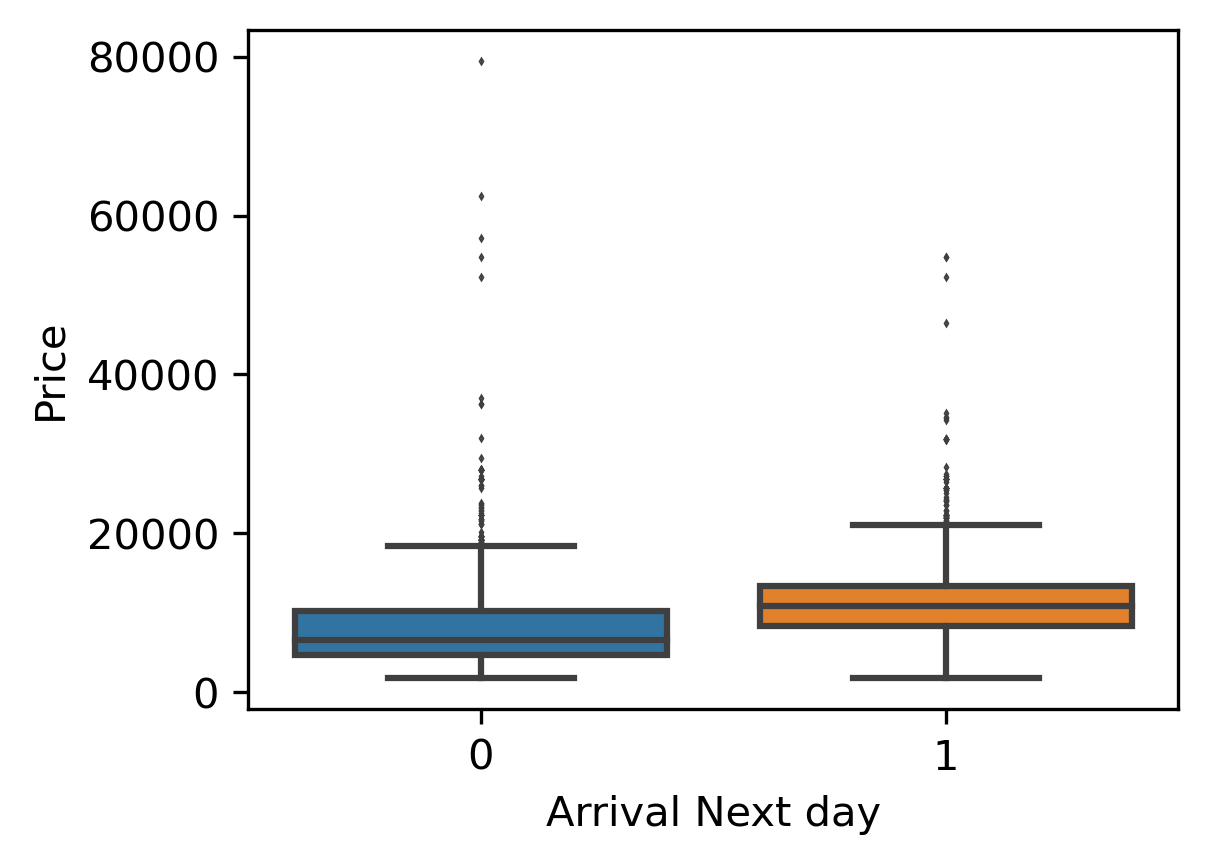

In [33]:
#is there any difference in price between arrival day on Next day(1) or same day as departure(0)
plt.figure(figsize=(4,3),dpi=300)
sb.boxplot(data=data,y='Price',x='Arrival Next day',fliersize=.3)

<Figure size 1800x1200 with 0 Axes>

Text(0, 0.5, 'Avg Price')

<Figure size 1800x1200 with 0 Axes>

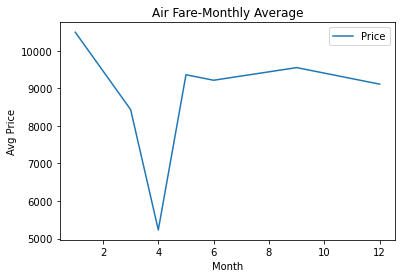

<Figure size 1800x1200 with 0 Axes>

Text(0, 0.5, 'Avg Price')

<Figure size 1800x1200 with 0 Axes>

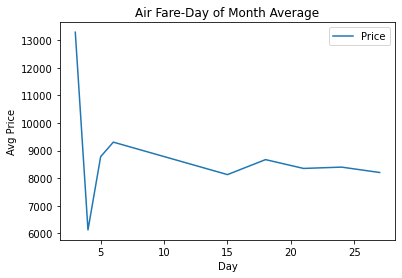

<Figure size 1800x1200 with 0 Axes>

Text(0, 0.5, 'Avg Price')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 1800x1200 with 0 Axes>

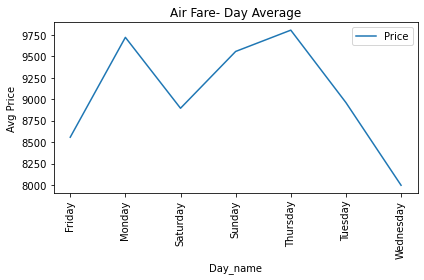

In [34]:
#Price distribution according to month
month_price=data.groupby(['Month']).agg({'Price':'mean'})
#month_price
plt.figure(dpi=300)
month_price.plot(kind='line',figsize=(6,4),title='Air Fare-Monthly Average')
plt.ylabel('Avg Price')
plt.savefig('airfare_Month.png')
plt.show()

day_price=data.groupby(['Day']).agg({'Price':'mean'})
plt.figure(dpi=300)
day_price.plot(kind='line',figsize=(6,4),title='Air Fare-Day of Month Average')
plt.ylabel('Avg Price')
plt.savefig('airfare_day_M.png')
plt.show()

day_name_price=data.groupby(['Day_name']).agg({'Price':'mean'})
plt.figure(dpi=300)
day_name_price.plot(kind='line',figsize=(6,4),title='Air Fare- Day Average')
plt.ylabel('Avg Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('airfare_day_w.png')
plt.show()

4th month April has lowest price and possible reasons could be
1. Peak Summer in India
2. School/College Exams in India
3. Beggining of Financial year

Travel Date_of_Journey is on Wednesday price is lowest as it is mid of week day. Peaks on Monday and Thrursday as many might be travelling to work or from work respectively.
<br>Surprisingly if travel Date_of_Journey in first day of the month mean price is high and 4th day of month is lowest. It would be intersting to see data for different years to see pattern.
<br>It would be interesting to look at number of passengers per flight (counting tickets)/ holidays or festivals of India


<Figure size 450x300 with 0 Axes>

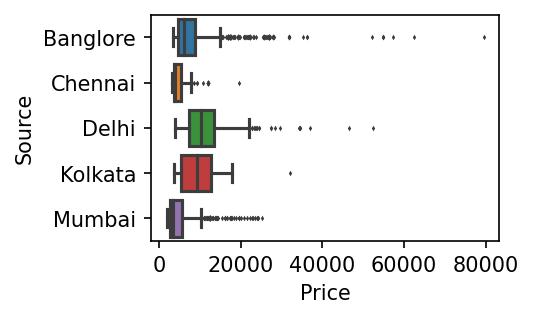

<Figure size 450x300 with 0 Axes>

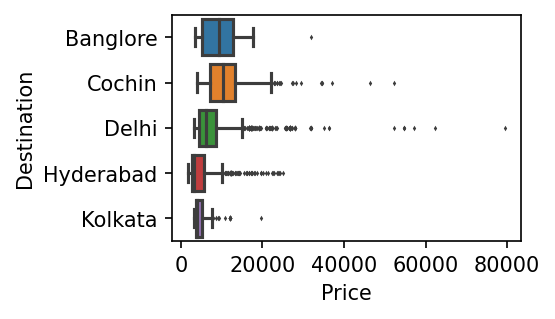

<Figure size 450x300 with 0 Axes>

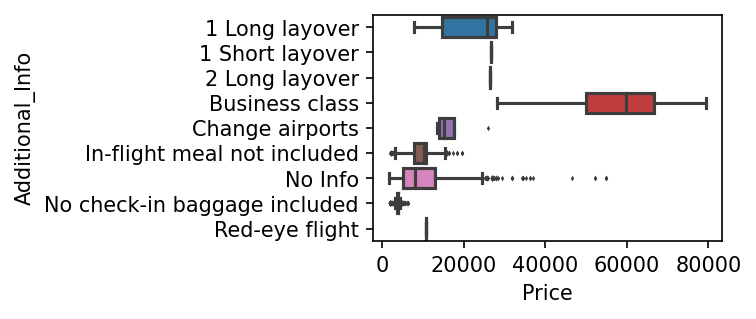

In [35]:
#certain airports levy tax on aircraft carriers which contribute to price of ticket. Visualizing differences in price depending on source and destination airport
plt.figure(figsize=(3,2),dpi=150)
sb.boxplot(data=data.sort_values(by='Source'),y='Source',x='Price',fliersize=.5)
plt.show()
plt.figure(figsize=(3,2),dpi=150)
sb.boxplot(data=data.sort_values(by='Destination'),y='Destination',x='Price',fliersize=.5)
plt.show()
plt.figure(figsize=(3,2),dpi=150)
sb.boxplot(data=data.sort_values(by='Additional_Info'),y='Additional_Info',x='Price',fliersize=.5)
plt.show()

In [36]:
#change layover levels to one as has layover 
data['Additional_Info'] = data['Additional_Info'].replace({'No info': 'No Info',
                                              '1 Short layover': 'Has Layover',
                                              '1 Long layover': 'Has Layover',
                                              '2 Long layover': 'Has Layover'})
test['Additional_Info'] = test['Additional_Info'].replace({'No info': 'No Info',
                                              '1 Short layover': 'Has Layover',
                                              '1 Long layover': 'Has Layover',
                                              '2 Long layover': 'Has Layover'})



In [37]:
#idx = data[data['Total_Stops']==0].index
#train_data.loc[idx,'Total_Stops'] = train_data['Total_Stops'].mode()[0]
#data.loc[idx]

<Figure size 1000x600 with 0 Axes>

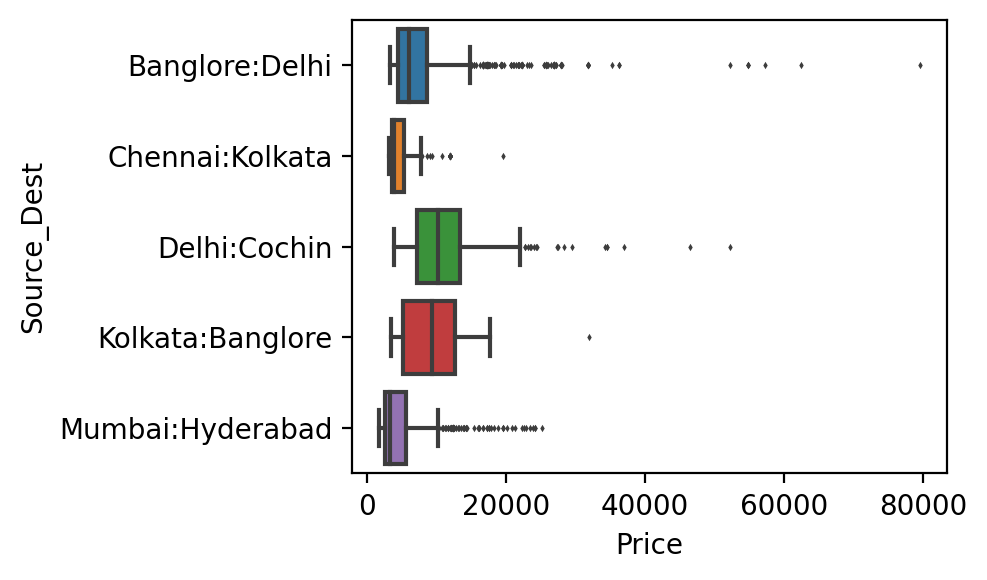

<Figure size 1000x600 with 0 Axes>

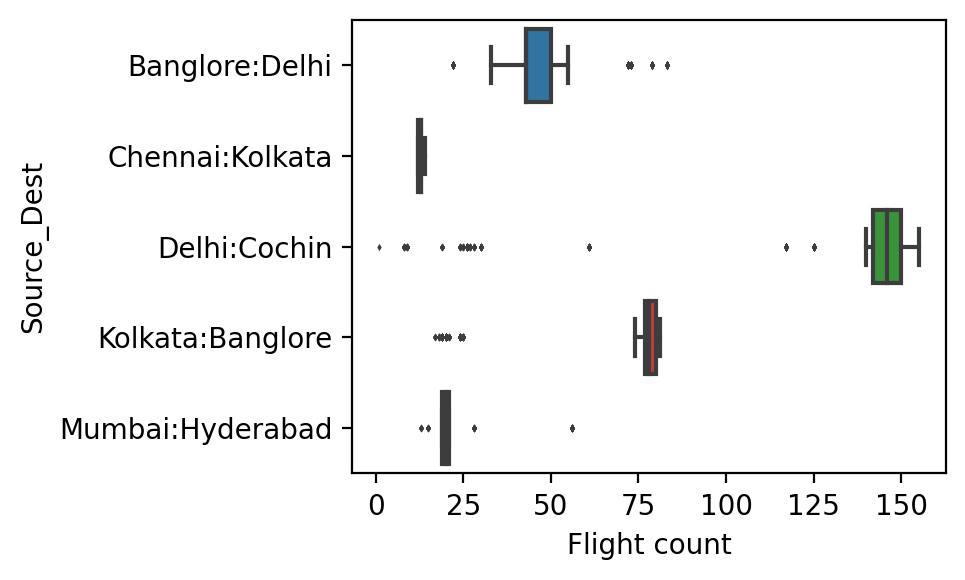

In [38]:
#combine source and dest
test['Source_Dest']=test['Source']+':'+test['Destination']
data['Source_Dest']=data['Source']+':'+data['Destination']
plt.figure(figsize=(5,3),dpi=200)
sb.boxplot(data=data.sort_values(by='Source_Dest'),y='Source_Dest',x='Price',fliersize=.5)
plt.tight_layout()
plt.savefig('price_vs_sourceDest.png')
plt.show()
plt.figure(figsize=(5,3),dpi=200)
sb.boxplot(data=data.sort_values(by='Source_Dest'),y='Source_Dest',x='Flight count',fliersize=.5)
plt.tight_layout()
plt.savefig('FC_vs_sourceDest.png')
plt.show()

There is difference between price range for different source and destination airports.
<br>Difference in price observed in different levels of Additional_Info column as expected.

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Dep_Time v/s Price')

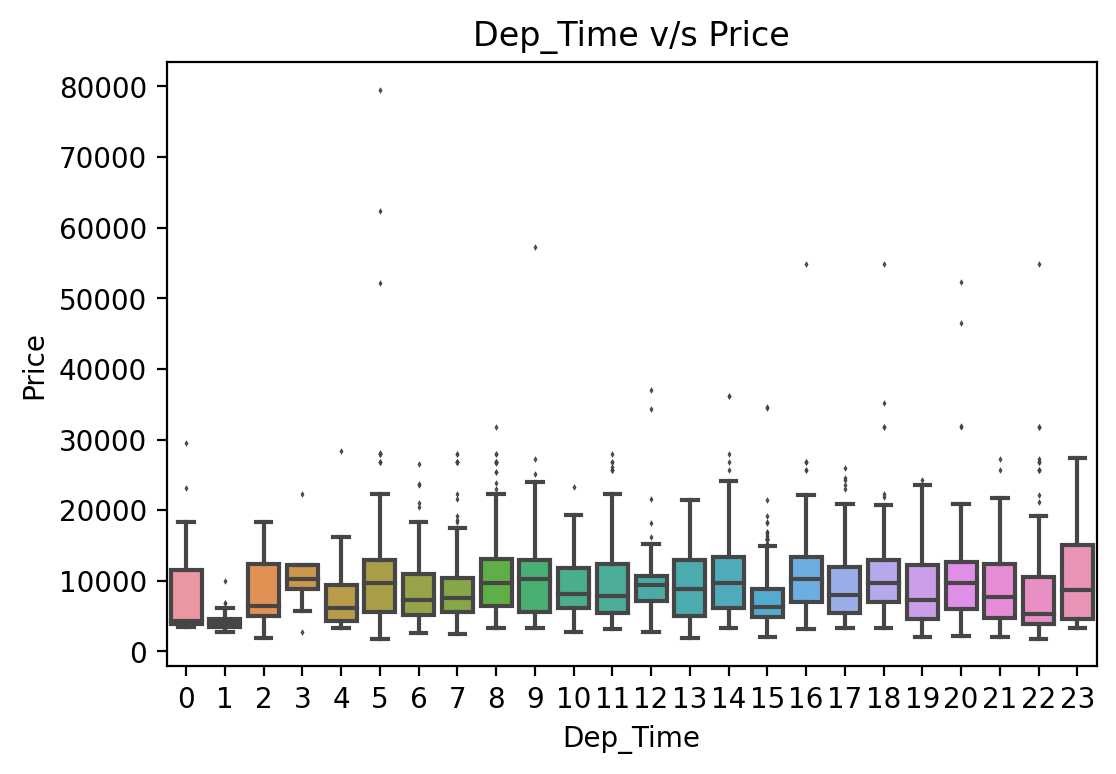

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Arrival_Time v/s Price')

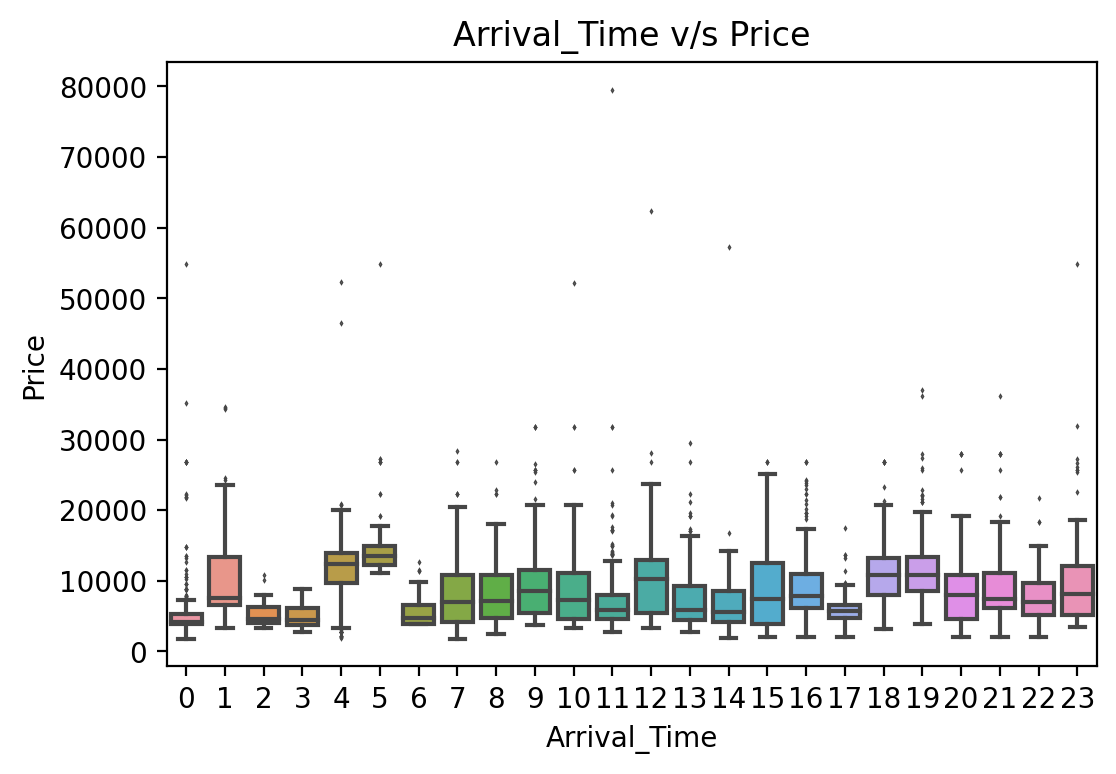

In [39]:
# Difference in deparute time and price
plt.figure(dpi=200)
sb.boxplot(data=data,x='Dep_Time',y='Price',fliersize=.3)
plt.title('Dep_Time v/s Price')
plt.savefig('price_dep_hour.png')
plt.show()

plt.figure(dpi=200)
sb.boxplot(data=data,x='Arrival_Time',y='Price',fliersize=.3)
plt.title('Arrival_Time v/s Price')
plt.savefig('price_arr_hour.png')
plt.show()

In [40]:
#bin arival hour and departure hour
data['dep_time_bin'] = pd.cut(data['Dep_Time'], bins=[0,8,16,23], labels=["12am-8am", "8am-4pm",'4pm-12am'])

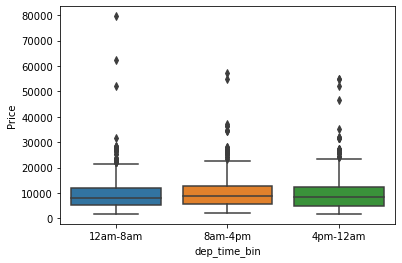

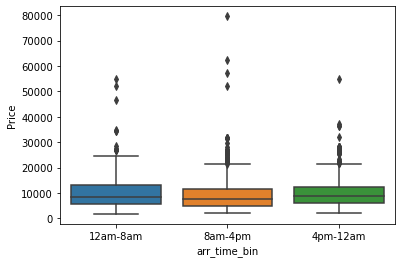

In [41]:
data['arr_time_bin'] = pd.cut(data['Arrival_Time'], bins=[0,8,16,23], labels=["12am-8am", "8am-4pm",'4pm-12am'])
sb.boxplot(data=data,x='dep_time_bin',y='Price')
plt.show()
sb.boxplot(data=data,x='arr_time_bin',y='Price')

In [42]:
test['dep_time_bin'] = pd.cut(test['Dep_Time'], bins=[0,8,16,23], labels=["12am-8am", "8am-4pm",'4pm-12am'])
test['arr_time_bin'] = pd.cut(test['Arrival_Time'], bins=[0,8,16,23], labels=["12am-8am", "8am-4pm",'4pm-12am'])



In [43]:
#combine trujet (1 instance) and multiple carriers /multiple carriers premium economy to one group 'multiple carriers'
data['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [44]:
data['Airline']=data.Airline.replace({'Multiple carriers Premium economy':'Multiple carriers','Trujet':'Multiple carriers'})
test['Airline']=test.Airline.replace({'Multiple carriers Premium economy':'Multiple carriers','Trujet':'Multiple carriers'})

<br> There is difference in price range for different hour of departure and arrival. Departure hour 1 am and  3pm with least Price range.
<br> Arrival_Time Arrival_Time 12am. 2am,3am and 5om with lower range whereas, 5am has highest price range.  
<br> Prices greately vary depending on arrival hour than departure hour

### Outliers

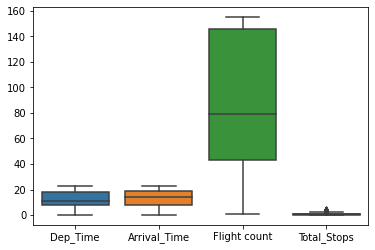

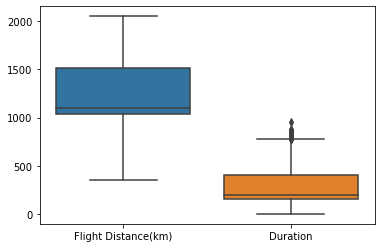

[]

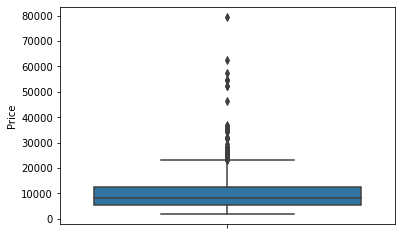

In [45]:
#check results without outlier treatement

sb.boxplot(data=data[['Dep_Time','Arrival_Time','Flight count','Total_Stops']])
plt.show()
sb.boxplot(data=data[['Flight Distance(km)','Duration']])
plt.savefig('jt_fc.png')
plt.show()
sb.boxplot(data['Price'],orient='v')
plt.plot(ylog=True)
plt.savefig('price.png')
plt.show()

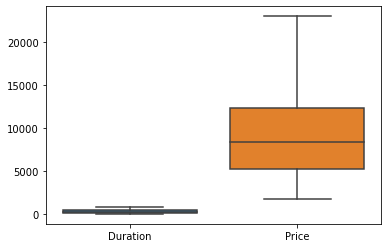

In [46]:
#Duration and flight distance have outliers capping them using 99 percentile value
def outliers(col):
    q3= data[col].quantile(0.75)
    q1= data[col].quantile(0.25)
    iqr = q3-q1
    ub = q3 +1.5*iqr
    lb = q1 - 1.5*iqr
    return(iqr,ub,lb)
cols=['Duration','Price']
for col in cols:
    iqr,ub,lb=outliers(col)
    data[col]=data[col].replace(data[data[col]<lb][col], data[col].quantile(0.01))
    if col =='Duration':
        q=.97 #reached this as optimum to cap outliers with trial and error method
    else:
        q=.99
    data[col]=data[col].replace(data[data[col]>ub][col], data[col].quantile(q))

#boxplot to verify outliers are capped
sb.boxplot(data=data[['Duration','Price']])


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Airline              10683 non-null  object  
 1   Source               10683 non-null  object  
 2   Destination          10683 non-null  object  
 3   Dep_Time             10683 non-null  int64   
 4   Arrival_Time         10683 non-null  int64   
 5   Duration             10683 non-null  float64 
 6   Total_Stops          10683 non-null  int64   
 7   Additional_Info      10683 non-null  object  
 8   Price                10683 non-null  int64   
 9   Flight count         10683 non-null  int64   
 10  Flight Distance(km)  10683 non-null  float64 
 11  Month                10683 non-null  int64   
 12  Day_name             10683 non-null  object  
 13  Day                  10683 non-null  int64   
 14  Arrival Next day     10683 non-null  object  
 15  Source_Dest        

### Data encoding

In [48]:
data['Arrival Next day']=data['Arrival Next day'].astype(int)


out=data['Price']
data=data.drop('Price',1)
num=data._get_numeric_data().drop(['Dep_Time','Arrival_Time'],1)
#day_name can be considered as labels hence using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Day_name']=le.fit_transform(data['Day_name'])
data['Additional_Info']=le.fit_transform(data['Additional_Info'])

#encoding ordered dep time and arrival time categories
data['dep_time_bin']=data.dep_time_bin.replace({'12am-8am':0,'8am-4pm':1,'4pm-12am':2})
data['arr_time_bin']=data.arr_time_bin.replace({'12am-8am':0,'8am-4pm':1,'4pm-12am':2})




#one hot encoding for nominal data (airline) source and destination city may not have profound impact on price 
dummy=pd.get_dummies(data[['Airline','Source_Dest']],drop_first=True)
inp=pd.concat([num,data['Day_name'],data['Additional_Info'],dummy],axis=1)
inp.head(2)



,Duration,Total_Stops,Flight count,Flight Distance(km),Month,Day,Arrival Next day,Day_name,Additional_Info,Airline_Air India,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Dest_Chennai:Kolkata,Source_Dest_Delhi:Cochin,Source_Dest_Kolkata:Banglore,Source_Dest_Mumbai:Hyderabad
0,170.00,0,50,"1,709.71",3,24,1,3,4,0,...,0,0,0,0,0,0,0,0,0,0
1,148.33,2,78,612.85,1,5,0,2,4,1,...,0,0,0,0,0,0,0,0,1,0


In [49]:
#similarly encode test data as well 
test.head(2)
test['Arrival Next day']=test['Arrival Next day'].astype(int)


test_x=test._get_numeric_data().drop(['Dep_Time','Arrival_Time'],1)
#day_name can be considered as labels hence using label encoder

test_x['Day_name']=le.fit_transform(test['Day_name'])
test_x['Additional_Info']=le.fit_transform(test['Additional_Info'])


#encoding ordered dep time and arrival time categories
test['dep_time_bin']=test.dep_time_bin.replace({'12am-8am':0,'8am-4pm':1,'4pm-12am':2})
test['arr_time_bin']=test.arr_time_bin.replace({'12am-8am':0,'8am-4pm':1,'4pm-12am':2})


#one hot encoding for nominal data (airline) source and destination city may not have profound impact on price 
dummy=pd.get_dummies(test[['Airline','Source_Dest']],drop_first=True)
test_x=pd.concat([test_x,dummy],axis=1)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Flight count,Flight Distance(km),Month,Day_name,Day,Arrival Next day,Source_Dest,dep_time_bin,arr_time_bin
0,Jet Airways,Delhi,Cochin,17,4,327.50,1,No Info,146,"1,100.80",6,Thursday,6,1,Delhi:Cochin,4pm-12am,12am-8am
1,IndiGo,Kolkata,Banglore,6,10,2.00,1,No Info,78,827.31,12,Thursday,5,0,Kolkata:Banglore,12am-8am,8am-4pm


In [50]:
test_x.head(2)
inp.head(2)

,Duration,Total_Stops,Flight count,Flight Distance(km),Month,Day,Arrival Next day,Day_name,Additional_Info,Airline_Air India,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Dest_Chennai:Kolkata,Source_Dest_Delhi:Cochin,Source_Dest_Kolkata:Banglore,Source_Dest_Mumbai:Hyderabad
0,327.50,1,146,"1,100.80",6,6,1,4,4,0,...,1,0,0,0,0,0,0,1,0,0
1,2.00,1,78,827.31,12,5,0,4,4,0,...,0,0,0,0,0,0,0,0,1,0


,Duration,Total_Stops,Flight count,Flight Distance(km),Month,Day,Arrival Next day,Day_name,Additional_Info,Airline_Air India,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Dest_Chennai:Kolkata,Source_Dest_Delhi:Cochin,Source_Dest_Kolkata:Banglore,Source_Dest_Mumbai:Hyderabad
0,170.00,0,50,"1,709.71",3,24,1,3,4,0,...,0,0,0,0,0,0,0,0,0,0
1,148.33,2,78,612.85,1,5,0,2,4,1,...,0,0,0,0,0,0,0,0,1,0


### Best Features

The 10 most important features are: Index(['Duration', 'Flight count', 'Flight Distance(km)', 'Day',
       'Airline_GoAir', 'Airline_Multiple carriers', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Dest_Chennai:Kolkata',
       'Source_Dest_Mumbai:Hyderabad'],
      dtype='object')


<Figure size 4800x1800 with 0 Axes>

<BarContainer object of 15 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

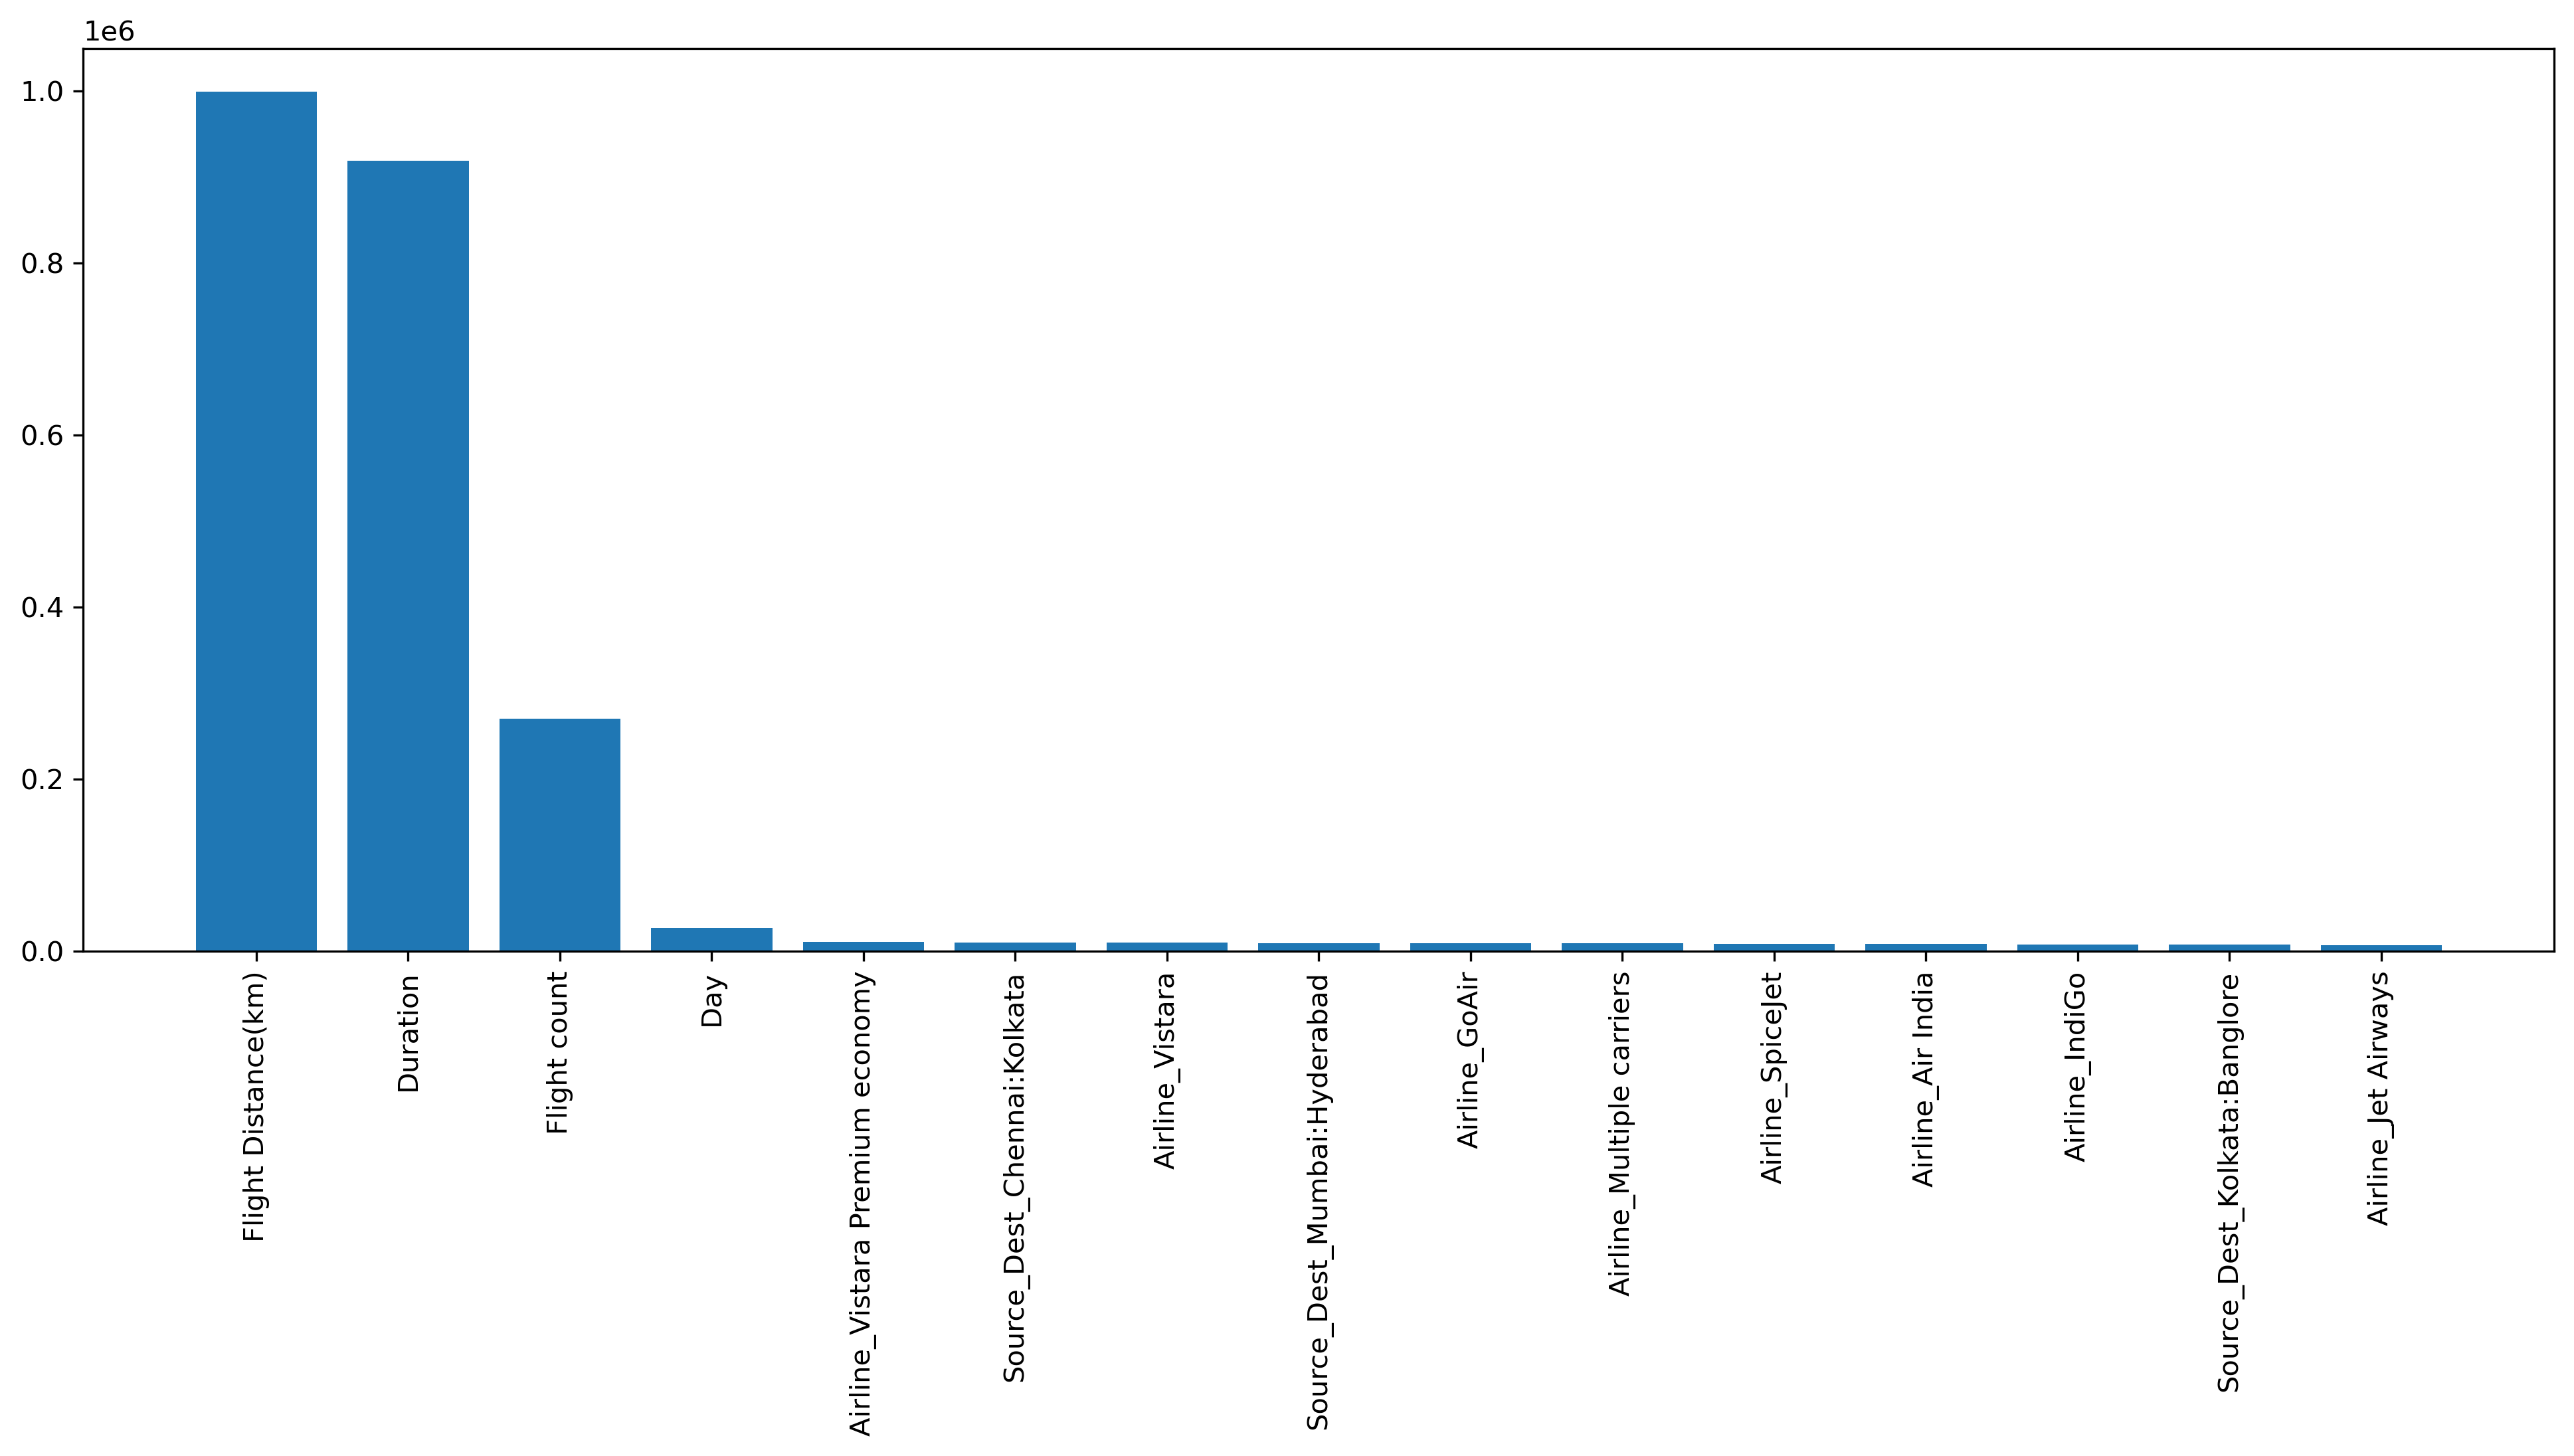

In [51]:
# to identify best feature for predicting air fare
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb=SelectKBest(chi2, k=10)
inp_new = skb.fit_transform(inp, out)

print("The 10 most important features are:", inp.columns[skb.get_support(indices=True)])
#to visualize best features based on score
test_feature = SelectKBest(score_func=chi2, k=10)
fit_feature = test_feature.fit(inp, out)

# summarize scores
np.set_printoptions(precision=2)
# Get the indices sorted by most important to least important
indices = np.argsort(fit_feature.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(inp.columns[indices[i]])

# Now plot
plt.figure(figsize=(16,6),dpi=300)
#plt.figure()
plt.bar(features, fit_feature.scores_[indices[range(15)]], align='center')
plt.xticks(rotation=90)
#plt.show()
plt.savefig('feature_importance.png', bbox_inches='tight')

In [52]:
#Verify features in TESt and TRAIN
set(inp.columns).difference(test_x.columns)
set(test_x.columns).difference(inp.columns)

set()

set()

In [158]:


out_sqrt=np.sqrt(out)

Top best features are Duration, Flight distance, flight count,Day of month.

## Model development

## Apply Machine Learning Algorithms:
At the end of performing the EDA, one must get the clarity over which predictive Machine Learning algorithm can be applied on the data to predict the airline price. Applying all the possible ML techniques and tabulating the results in-terms MSE, RMSE, R-square etc., will give the understanding about how different ML algorithms are performing on this dataset. Compare the typical traditional algorithms output versus the tree and boosting based techniques. 



In [53]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

,const,Duration,Total_Stops,Flight count,Flight Distance(km),Month,Day,Arrival Next day,Day_name,Additional_Info,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Dest_Chennai:Kolkata,Source_Dest_Delhi:Cochin,Source_Dest_Kolkata:Banglore,Source_Dest_Mumbai:Hyderabad
0,1.00,170.00,0,50,"1,709.71",3,24,1,3,4,...,0,0,0,0,0,0,0,0,0,0
1,1.00,148.33,2,78,612.85,1,5,0,2,4,...,0,0,0,0,0,0,0,0,1,0
2,1.00,6.33,2,146,890.44,9,6,1,0,4,...,1,0,0,0,0,0,0,1,0,0
3,1.00,162.50,1,78,937.36,12,5,0,4,4,...,0,0,0,0,0,0,0,0,1,0
4,1.00,142.50,1,83,871.52,1,3,0,4,4,...,0,0,0,0,0,0,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     930.9
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:12:51   Log-Likelihood:                -98658.
No. Observations:               10683   AIC:                         1.974e+05
Df Residuals:                   10660   BIC:                         1.975e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -5405.7413    391.840    -13.796      0.000   -6173.821   -4637.661
Duration                            0.8867      0.154      5.770      0.000       0.585       1.188
Total_Stops                      3154.0605     83.487     37.779      0.000    2990.411    3317.710
Flight count                       12.5809      1.032     12.188      0.000      10.558      14.604
Flight Distance(km)                 1.0953      0.154      7.133      0.000       0.794       1.396
Month                            -101.4016      8.438    -12.017      0.000    -117.943     -84.861
Day                               -75.9306      2.873    -26.431      0.000     -81.562     -70.300
Arrival Next day                  129.6487     63.489      2.042      0.041       5.198     254.099
Day_name                          -34.3246     11.827     -2.902      0.004     -57.507     -11.142
Additional_Info                  2290.6816     66.528     34.432      0.000    2160.274    2421.090
Airline_Air India                1556.7338    158.158      9.843      0.000    1246.714    1866.753
Airline_GoAir                     -32.7850    227.595     -0.144      0.885    -478.913     413.343
Airline_IndiGo                    389.6036    150.861      2.583      0.010      93.889     685.318
Airline_Jet Airways              5266.4929    152.222     34.597      0.000    4968.110    5564.876
Airline_Jet Airways Business     1.733e+04   1035.002     16.747      0.000    1.53e+04    1.94e+04
Airline_Multiple carriers        3772.0942    163.685     23.045      0.000    3451.241    4092.947
Airline_SpiceJet                 -976.3817    168.095     -5.809      0.000   -1305.879    -646.884
Airline_Vistara                  1723.0588    185.659      9.281      0.000    1359.132    2086.986
Airline_Vistara Premium economy  3363.1143   1441.960      2.332      0.020     536.604    6189.625
Source_Dest_Chennai:Kolkata       340.6350    148.898      2.288      0.022      48.767     632.503
Source_Dest_Delhi:Cochin        -1291.7662    109.722    -11.773      0.000   -1506.842   -1076.690
Source_Dest_Kolkata:Banglore     -650.6421     77.069     -8.442      0.000    -801.712    -499.572
Source_Dest_Mumbai:Hyderabad     -579.7714    177.523     -3.266      0.001    -927.750    -231.793
==============================================================================
Omnibus:                     2499.959   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8899.863
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       6.835   Cond. No.                     7.74e+04
==============================================================================

Warnings

,VIF,Feature
8,65.12,Additional_Info
3,42.96,Flight Distance(km)
2,18.69,Flight count
1,11.68,Total_Stops
12,11.64,Airline_Jet Airways
19,8.86,Source_Dest_Delhi:Cochin
11,6.70,Airline_IndiGo
9,6.64,Airline_Air India
0,4.94,Duration
4,4.83,Month


*******Lineaarity*******



(1.01945900403235, 0.24089337231114483)

*******Normality assumption*******



Text(0.5, 1.0, 'out_pred')

Text(0.5, 1.0, 'out')

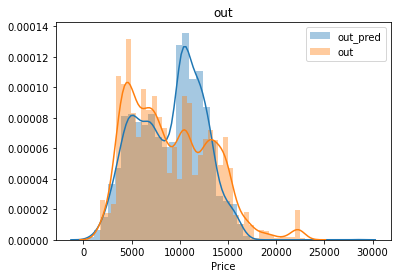

Text(0.5, 1.0, 'mod_residue')

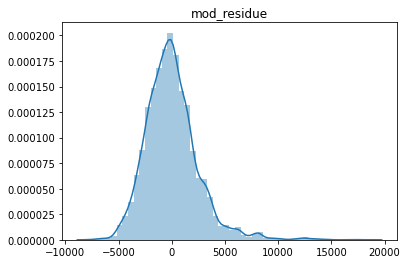

ShapiroResult(statistic=0.9440852403640747, pvalue=0.0)

*******homoscadacity assumption*******



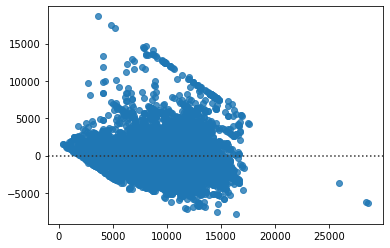

In [54]:
inp_c=sm.add_constant(inp)
inp_c.head()
ols_mod=sm.OLS(out,inp_c)
mod_reg=ols_mod.fit()
mod_reg.summary()

#multicollinearity

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in  range(inp.shape[1])]
vif['Feature']=inp.columns
vif.sort_values(by='VIF',ascending=False)
#linearity in prediction
print('*******Lineaarity*******\n')
out_pred=mod_reg.predict()

linear_rainbow(res=mod_reg,frac=0.5)
#normality
print('*******Normality assumption*******\n')
sb.distplot(out_pred,bins=40,label='out_pred')
plt.title('out_pred')
#plt.show()
sb.distplot(out,bins=40,label='out')
plt.title('out')
plt.legend()
plt.show()
sb.distplot(mod_reg.resid)
plt.title('mod_residue')
plt.show()

stats.shapiro(mod_reg.resid)
#homoscadacity assumption
print('*******homoscadacity assumption*******\n')
sb.residplot(mod_reg.predict(),mod_reg.resid)

High vif values for departure and Destination are observed. 

1. very high kurtosis is observed in model summary
2. scaling data may overcome non-normality of data
3. Autocorrelation assumption satisfied Durbin-Watson score in range(1.5-2.5) 2.004
4. Model feature p-values are all<0.05 for numeric columns but airlines and few destination.
5. model doesnt satisfy homoscadacity assumption completely, variance is somewhat randomly distributed for lesser examples

#### Solution 
* scaling of output 
* dropping highly correlated input features 
* backward elimination
<br>However, use of other non-linear machine learning models improves performance and solves multicollinearity
especially in Random Forest method as not all features are selected at once

## sklearn algorithms

### Checking Multiple Algorithms

In [53]:

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import pickle

In [54]:
#Prediction Algorithm Models



regf1=RandomForestRegressor(random_state=45)

regf2=GradientBoostingRegressor(random_state=45)
regf3=XGBRegressor(random_state=45)
regf4=LinearRegression()



In [55]:
from sklearn.model_selection import train_test_split
#use out_pow is transformed
xtrain,xtest,ytrain,ytest=train_test_split(inp,np.sqrt(out),test_size=0.3,random_state=48)

In [58]:
len(test_x)

2671

In [59]:
# 5- fold cross validation to select best model for prediction
def mod_eval(inp,out):
    alg=[]
    a_mse=[]
    a_mse_var=[]
    a_r2=[]
    a_r2_var=[]
    for i,j in zip([regf1,regf2,regf3,regf4],
                   ['RF','GBoost','XGB','LiR']):
        
        res=cross_val_score(i,inp,out,cv=5,scoring='neg_mean_squared_error')
        res=np.sqrt(abs(res))
        #print(j,'MSE_avg: ',np.mean(res),' Variance error: ',np.std(res))
        alg.append(j)
        a_mse.append(np.mean(res))
        a_mse_var.append(np.std(res))
        
        res1=cross_val_score(i,inp,out,cv=5,scoring='r2')
        #print(j,'Mean_r2: ',np.mean(res1),' Variance error: ',np.std(res1))
        a_r2.append(np.mean(res1))
        a_r2_var.append(np.std(res1))
    print('******DONE******')
    dct= {'ML Algorithm':alg,'MSE_av':a_mse,'MSE_var':a_mse_var,'R2_av':a_r2,'R2_var':a_r2_var}
    return(dct)

In [60]:
#'''#comment to run
#out as it is
dct = mod_eval(inp,out)

cv5_res=pd.DataFrame(dct,columns=['ML Algorithm','MSE_av','MSE_var','R2_av','R2_var'])

cv5_res.to_csv('ML_CV5.csv')
#'''#comment to run
cv5_res=pd.read_csv('ML_CV5.csv')
cv5_res
#'''#comment to run


******DONE******


,Unnamed: 0,ML Algorithm,MSE_av,MSE_var,R2_av,R2_var
0,0,RF,"1,216.55",24.67,0.92,0.00
1,1,GBoost,"1,639.21",31.75,0.85,0.00
2,2,XGB,"1,180.10",21.41,0.92,0.00
3,3,LiR,"2,488.34",18.75,0.66,0.01


In [61]:
#'''#comment to run
#out sqrt
dct = mod_eval(inp,np.sqrt(out))
cv5_res_sqrt=pd.DataFrame(dct,columns=['ML Algorithm','MSE_av','MSE_var','R2_av','R2_var'])
cv5_res_sqrt.to_csv('ML_CV5_out_sqrt.csv')
#'''#comment to run
cv5_res_sqrt=pd.read_csv('ML_CV5_out_sqrt.csv')
cv5_res_sqrt
#'''#comment to run



******DONE******


,Unnamed: 0,ML Algorithm,MSE_av,MSE_var,R2_av,R2_var
0,0,RF,6.05,0.11,0.93,0.00
1,1,GBoost,8.20,0.04,0.87,0.00
2,2,XGB,5.81,0.13,0.93,0.00
3,3,LiR,12.21,0.07,0.70,0.01


LinearRegression()

Linear Regression on xtest (output squareroot transformed):
--------------------------------------------------
R2 = 0.6992464159578144
MSE = 150.31890259019423
RMSE = 12.260460945257899
Linear Regression on xtrain (output squareroot transformed):
--------------------------------------------------
R2 = 0.7083157561840803
MSE = 147.927440469083
RMSE = 12.1625425166403


Text(0.5, 1.0, 'Regplot-Linearity')

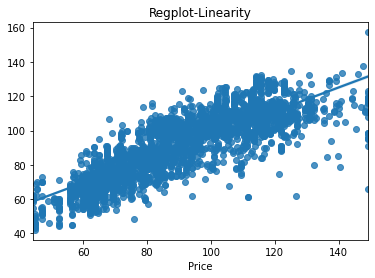

Text(0.5, 1.0, 'Regplot-Homoscadacity')

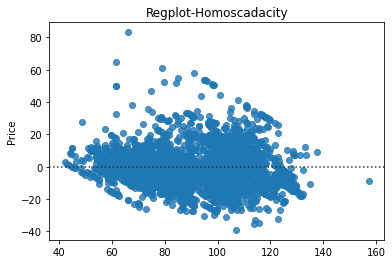

Text(0.5, 1.0, 'Ditribution')

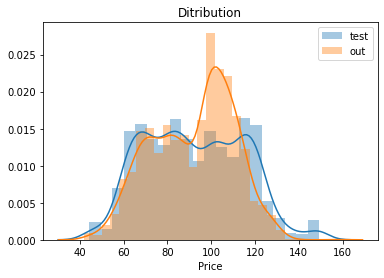

In [62]:
#'''#comment if you wish to run
#In cross validation LinearRegression to performed better on the data set
#verify that as well for prediction
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)
ypred = lin_reg.predict(xtest)
ytrain_pred = lin_reg.predict(xtrain)
print('Linear Regression on xtest (output squareroot transformed):')
print('-'*50)
print('R2 =',r2_score(ytest,ypred))
mse=mean_squared_error(ytest,ypred)
print('MSE =',mse)
rmse =np.sqrt(mse)
print('RMSE =',rmse)
print('Linear Regression on xtrain (output squareroot transformed):')
print('-'*50)
print('R2 =',r2_score(ytrain,ytrain_pred))
mse=mean_squared_error(ytrain,ytrain_pred)
print('MSE =',mse)
rmse =np.sqrt(mse)
print('RMSE =',rmse)

#visuals
#plt.figure(figsize=(3,2),dpi=200)
sb.regplot(ytest,ypred)
plt.title('Regplot-Linearity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.residplot(ypred,ytest-ypred)
plt.title('Regplot-Homoscadacity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.distplot(ytest,label='test')
sb.distplot(ypred,label='out')
plt.legend()
plt.title('Ditribution')

#'''#comment if you wish to run

<br> Random Forest Method is selected for further tuning with output squareroot transformed

## Hyperparameter tuning

## Regularization and Parameter Tuning
The prediction model output reliability can be improved using regularization techniques and parameter tuning. One can play with the different parameters for each algorithm, using GridSearchCV and RandomSearchCV packages to identify the optimal values which produce the maximum performance. 


In [63]:
from sklearn.model_selection import KFold

In [64]:
#'''
kf=KFold(n_splits=5,shuffle=True,random_state=45) #shuffle true to randomly arange data
param_n=list(np.linspace(10,100,10,dtype='int'))#number of trees
param_t=list(np.linspace(10,60,10,dtype='int'))
pi=[]
pj=[]
r2=[]
rmse = []
mse = []
for i in param_n:
    for j in param_t:
        pi.append(i)
        pj.append(j)
        rf_reg = RandomForestRegressor(n_estimators = i,random_state=45,max_depth=j)
        res = cross_val_score(rf_reg,inp,np.sqrt(out),cv = 5,scoring ='neg_mean_squared_error')
        mse.append(np.mean(res))
        res=np.sqrt(abs(res))
        rmse.append(np.mean(res))
        
        res1 = cross_val_score(rf_reg,inp,np.sqrt(out),cv = 5,scoring ='r2',)
        r2.append(np.mean(res1))
    print('R2',np.mean(res1))
    print('The variance Error: ',np.std(res1))
#'''

R2 0.9232545520683704
The variance Error:  0.002072303778693701
R2 0.9254789285878033
The variance Error:  0.0024067539397239187
R2 0.9264622406830029
The variance Error:  0.0026362258705547523
R2 0.9268307152320784
The variance Error:  0.002573941038470596
R2 0.9270214683906477
The variance Error:  0.002893038690936497
R2 0.927381617057508
The variance Error:  0.0029797987258260686
R2 0.927546301319909
The variance Error:  0.0030069750497506097
R2 0.9274812825871184
The variance Error:  0.003046810468957012
R2 0.9273473999494322
The variance Error:  0.0030192614122920743
R2 0.9274777975389134
The variance Error:  0.0031128341235879815


In [65]:
#'''
params=list(zip(pi,pj))
res_df=pd.DataFrame(columns=['params(n_est,depth)','mse','rmse','r2'])
res_df['params(n_est,depth)']=params
res_df['mse']=mse
res_df['rmse']=rmse
res_df['r2']=r2


#write to a file and keep results
res_df.sort_values(by=['r2'],ascending=False).to_csv('results_n_est_t_depth.csv')
#'''
#reusing previously written
res_df=pd.read_csv('results_n_est_t_depth.csv')

res_df.head()
res_df.shape
print('max R2 =',res_df.iloc[res_df['r2'].idxmax()])
print('min RMSE =',res_df.iloc[res_df['rmse'].idxmin()])

res_df.sort_values(by=['r2'],ascending=False).head(10) #10 best results
#pd.DataFrame(data=[mse,rmse,r2],index=params,columns=['mse','rmse','r2'])
print('****RMSE*****\n')
res_df['rmse'].describe()
print('****R2*****\n')
res_df['r2'].describe()



,Unnamed: 0,"params(n_est,depth)",mse,rmse,r2
0,91,"(100, 15)",-35.89,5.99,0.93
1,71,"(80, 15)",-35.93,5.99,0.93
2,61,"(70, 15)",-35.97,6.00,0.93
3,81,"(90, 15)",-35.99,6.00,0.93
4,51,"(60, 15)",-36.07,6.01,0.93


(100, 5)

max R2 = Unnamed: 0                              91
params(n_est,depth)              (100, 15)
mse                                 -35.89
rmse                                  5.99
r2                                    0.93
Name: 0, dtype: object
min RMSE = Unnamed: 0                              91
params(n_est,depth)              (100, 15)
mse                                 -35.89
rmse                                  5.99
r2                                    0.93
Name: 0, dtype: object


,Unnamed: 0,"params(n_est,depth)",mse,rmse,r2
0,91,"(100, 15)",-35.89,5.99,0.93
1,71,"(80, 15)",-35.93,5.99,0.93
2,61,"(70, 15)",-35.97,6.00,0.93
3,81,"(90, 15)",-35.99,6.00,0.93
4,51,"(60, 15)",-36.07,6.01,0.93
5,41,"(50, 15)",-36.24,6.02,0.93
6,62,"(70, 21)",-36.27,6.02,0.93
7,92,"(100, 21)",-36.29,6.02,0.93
8,72,"(80, 21)",-36.30,6.02,0.93
9,52,"(60, 21)",-36.32,6.03,0.93


****RMSE*****



count                 100.00
mean                    6.14
std                     0.20
min                     5.99
25%                     6.05
50%                     6.06
75%                     6.12
max                     6.80
Name: rmse, dtype: float64

****R2*****



count                 100.00
mean                    0.93
std                     0.01
min                     0.91
25%                     0.93
50%                     0.93
75%                     0.93
max                     0.93
Name: r2, dtype: float64

### RMSE is fairly constant around 5.8 and r2 is fairly constant around .93 for max_depth= 20--50 and n_estimators =90 to 100
Taking cue from above results keeping max depth =20,30,30, n_estimators above above 90

In [52]:

'''#comment it to run
#too time consuming and computation power is not sufficient
from sklearn.model_selection import GridSearchCV
rf_reg = RandomForestRegressor(random_state=45) #freeze random state

param = {'n_estimators':[100,120,130,140,150],
         'max_depth':[26,32,43],
         'max_features':['auto','sqrt'],
         'criterion':['mse','mae'], 
         'max_samples':[0.6,0.7]}
grid = GridSearchCV(rf_reg,param_grid = param,scoring = 'r2',return_train_score=True)
'''#comment it to run
#fit model
#hyp_rf = grid.fit(xtrain,ytrain)

"#comment it to run\n#too time consuming and computation power is not sufficient\nfrom sklearn.model_selection import GridSearchCV\nrf_reg = RandomForestRegressor(random_state=45) #freeze random state\n\nparam = {'n_estimators':[100,120,130,140,150],\n         'max_depth':[26,32,43],\n         'max_features':['auto','sqrt'],\n         'criterion':['mse','mae'], \n         'max_samples':[0.6,0.7]}\ngrid = GridSearchCV(rf_reg,param_grid = param,scoring = 'r2',return_train_score=True)\n"

In [53]:
'''#save model
file=open("flight_RF_GSCV1.pkl","wb")
pickle.dump(hyp_rf,file)
'''
#load from presaved
model=open("flight_RF_GSCV1.pkl","rb")
hyp_rf=pickle.load(model)


'#save model\nfile=open("flight_RF_GSCV1.pkl","wb")\npickle.dump(hyp_rf,file)\n'

In [54]:
#'''
#detailed report of model performance
res_gs1 =pd.DataFrame(hyp_rf.cv_results_)
#write to a file and keep
res_gs1.to_csv('grid_searchcv1_res.csv')
#'''
#reading from saved file
#res_gs1=pd.read_csv('grid_searchcv1_res.csv')

res_gs1.sort_values(by=['rank_test_score']).head(1)

hyp_rf.best_estimator_
hyp_rf.best_params_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,1.89,0.24,0.04,0.01,mse,26,auto,0.70,150,"{'criterion': 'mse', 'max_depth': 26, 'max_fea...",...,0.92,0.01,1,0.98,0.98,0.98,0.98,0.98,0.98,0.00


RandomForestRegressor(max_depth=26, max_samples=0.7, n_estimators=150,
                      random_state=45)

{'criterion': 'mse',
 'max_depth': 26,
 'max_features': 'auto',
 'max_samples': 0.7,
 'n_estimators': 150}

In [55]:
y_train_predgs1 = hyp_rf.predict(xtrain)
y_test_predgs1 = hyp_rf.predict(xtest)
print("GridSearchCV1 Results for Random Forest Regressor Model:")
print(50 * '-')
mse=mean_squared_error(ytest, y_test_predgs1)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R2: ", r2_score(ytest, y_test_predgs1))
print("\nGridSearchCV1 Results for Random Forest Regressor Model:on train data")
print(50 * '-')
mse=mean_squared_error(ytrain, y_train_predgs1)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R2: ", r2_score(ytrain, y_train_predgs1))

GridSearchCV1 Results for Random Forest Regressor Model:
--------------------------------------------------
RMSE:  5.890579420736553
MSE:  34.69892591200498
R2:  0.9314119700113513

GridSearchCV1 Results for Random Forest Regressor Model:on train data
--------------------------------------------------
RMSE:  3.1170274095864747
MSE:  9.71585987211337
R2:  0.9807493612818036


## Visuals for GridSearchCV1

Text(0.5, 1.0, 'Regplot-Linearity')

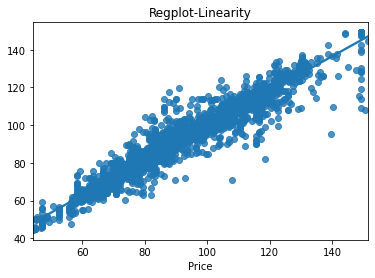

Text(0.5, 1.0, 'Regplot-Homoscadacity')

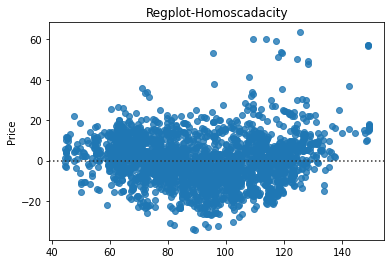

Text(0.5, 1.0, 'Ditribution')

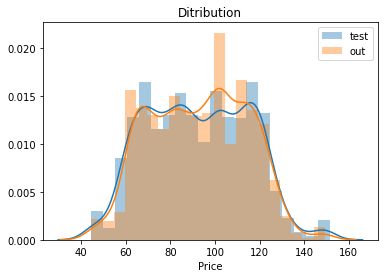

In [56]:
#plt.figure(figsize=(3,2),dpi=200)
sb.regplot(ytest,y_test_predgs1)
plt.title('Regplot-Linearity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.residplot(y_test_predgs1,ytest-ypred)
plt.title('Regplot-Homoscadacity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.distplot(ytest,label='test')
sb.distplot(y_test_predgs1,label='out')
plt.legend()
plt.title('Ditribution')

In [57]:
'''#comment it to run
#second set of values for grid search
rf_reg=RandomForestClassifier(random_state=45)
param2 = {'n_estimators':[100,140,150,180,190],
         'max_depth':[26,43],
         'max_features':['auto'],
         'criterion':['mse'], 
         'max_samples':[0.7],
         'min_samples_split':[2,10,20],
         'min_samples_leaf':[1,5,10]
        }
grid2 = GridSearchCV(rf_reg,param_grid = param2,scoring = 'r2',return_train_score=True)
hyp_rf2 = grid2.fit(xtrain,ytrain)
hyp_rf2.best_params_
hyp_rf2.best_score_
#save model

file=open("flight_RF_GSCV2.pkl","wb")
pickle.dump(hyp_rf2,file)
#'''#comment it to run

'#comment it to run\n#second set of values for grid search\nrf_reg=RandomForestClassifier(random_state=45)\nparam2 = {\'n_estimators\':[100,140,150,180,190],\n         \'max_depth\':[26,43],\n         \'max_features\':[\'auto\'],\n         \'criterion\':[\'mse\'], \n         \'max_samples\':[0.7],\n         \'min_samples_split\':[2,10,20],\n         \'min_samples_leaf\':[1,5,10]\n        }\ngrid2 = GridSearchCV(rf_reg,param_grid = param2,scoring = \'r2\',return_train_score=True)\nhyp_rf2 = grid2.fit(xtrain,ytrain)\nhyp_rf2.best_params_\nhyp_rf2.best_score_\n#save model\n\nfile=open("flight_RF_GSCV2.pkl","wb")\npickle.dump(hyp_rf2,file)\n#'

In [58]:
#load from saved file
model=open("flight_RF_GSCV2.pkl","rb")
hyp_rf2=pickle.load(model)

In [59]:

#detailed report of model performance
res_gs2 =pd.DataFrame(hyp_rf2.cv_results_)
res_gs2.shape
#write to a file and keep
res_gs2.to_csv('grid_searchcv2_res.csv')
res_gs2=pd.read_csv('grid_searchcv2_res.csv')
res_gs2.sort_values(by=['rank_test_score']).head(5)

#res_gs1.columns

(90, 27)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,2,1.71,0.09,0.05,0.02,mse,26,auto,0.70,1,...,0.92,0.01,1,0.98,0.98,0.98,0.98,0.98,0.98,0.00
47,47,1.73,0.12,0.04,0.00,mse,43,auto,0.70,1,...,0.92,0.01,2,0.98,0.98,0.98,0.98,0.98,0.98,0.00
1,1,1.54,0.01,0.04,0.00,mse,26,auto,0.70,1,...,0.92,0.01,3,0.98,0.98,0.98,0.98,0.98,0.98,0.00
46,46,1.56,0.01,0.04,0.00,mse,43,auto,0.70,1,...,0.92,0.01,4,0.98,0.98,0.98,0.98,0.98,0.98,0.00
3,3,2.38,0.25,0.05,0.00,mse,26,auto,0.70,1,...,0.92,0.01,5,0.98,0.98,0.98,0.98,0.98,0.98,0.00


In [60]:
hyp_rf2.best_estimator_
hyp_rf2.best_params_

RandomForestRegressor(max_depth=26, max_samples=0.7, n_estimators=150,
                      random_state=45)

{'criterion': 'mse',
 'max_depth': 26,
 'max_features': 'auto',
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [61]:
y_train_predgs2 = hyp_rf2.predict(xtrain)
y_test_predgs2 = hyp_rf2.predict(xtest)
print("GridSearchCV2 Results for Random Forest Regressor Model:")
print(50 * '-')
mse=mean_squared_error(ytest, y_test_predgs2)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R2: ", r2_score(ytest, y_test_predgs2))
print("\nGridSearchCV2 Results for Random Forest Regressor Model:on train data")
print(50 * '-')
mse=mean_squared_error(ytrain, y_train_predgs2)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R2: ", r2_score(ytrain, y_train_predgs2))

GridSearchCV2 Results for Random Forest Regressor Model:
--------------------------------------------------
RMSE:  5.890579420736553
MSE:  34.69892591200498
R2:  0.9314119700113513

GridSearchCV2 Results for Random Forest Regressor Model:on train data
--------------------------------------------------
RMSE:  3.1170274095864747
MSE:  9.71585987211337
R2:  0.9807493612818036


In [67]:
#'''#comment to run
# Param values for randomizedsearch
from sklearn.model_selection import RandomizedSearchCV
ran_rf=RandomForestRegressor()
tuned_params = {'n_estimators': [100, 200, 300, 400, 500],
                'max_depth':[15,25,30],
                'min_samples_split': [2, 5, 10], 
                'min_samples_leaf': [1, 2, 4]}

rscv = RandomizedSearchCV(ran_rf, 
                                      tuned_params, n_iter = 20, 
                                      scoring = 'neg_mean_squared_error', cv = 5)
                                      
rsv_RF=rscv.fit(xtrain,ytrain)
#save model

file=open("flight_RF_RSCV.pkl","wb")
pickle.dump(rsv_RF,file)
#
#'''#comment to run

In [68]:
#load from stored file
model=open("flight_RF_RSCV.pkl","rb")
rsv_RF=pickle.load(model)

In [69]:
y_train_pred = rsv_RF.predict(xtrain)
y_test_pred = rsv_RF.predict(xtest)
rsv_RF.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 25}

In [71]:
#'''
resrsv_RF =pd.DataFrame(rsv_RF.cv_results_)

#write to a file and keep
resrsv_RF.to_csv('randomised_searchcv_res.csv')
#'''
resrsv_RF=pd.read_csv('randomised_searchcv_res.csv')


In [72]:
print("RandomisedSearchCV Results for Random Forest Regressor Model:")
print(50 * '-')
mse=mean_squared_error(ytest, y_test_pred)
print("RMSE: ", np.sqrt(mean_squared_error(ytest, y_test_pred)))
print("MSE: ", mse)
print("R2: ", r2_score(ytest, y_test_pred))
print("\nRandomisedSearchCV Results for Random Forest Regressor Model:on train data")
print(50 * '-')
mse=mean_squared_error(ytrain, y_train_pred)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R2: ", r2_score(ytrain, y_train_pred))


RandomisedSearchCV Results for Random Forest Regressor Model:
--------------------------------------------------
RMSE:  6.391419063169683
MSE:  40.85023764104883
R2:  0.9182680609835567

RandomisedSearchCV Results for Random Forest Regressor Model:on train data
--------------------------------------------------
RMSE:  3.488547902929272
MSE:  12.16996647103222
R2:  0.9760031846957425


### Visuals for RandomizedSearchCV

Text(0.5, 1.0, 'Regplot-Linearity')

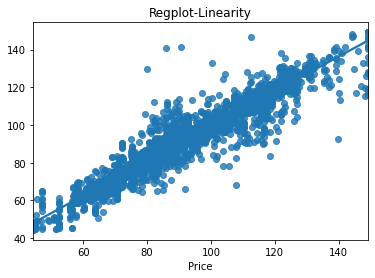

Text(0.5, 1.0, 'Regplot-Homoscadacity')

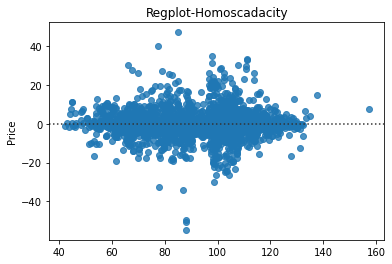

Text(0.5, 1.0, 'Ditribution')

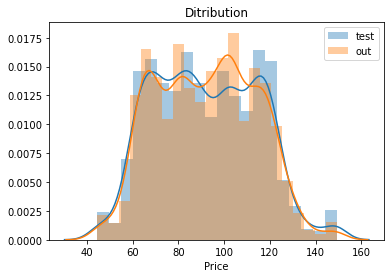

In [73]:
#visuals
#plt.figure(figsize=(3,2),dpi=200)
sb.regplot(ytest,y_test_pred)
plt.title('Regplot-Linearity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.residplot(ypred,ytest-y_test_pred)
plt.title('Regplot-Homoscadacity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.distplot(ytest,label='test')
sb.distplot(y_test_pred,label='out')
plt.legend()
plt.title('Ditribution')

# XGBoost RandomizedSearchCV

In [75]:
from sklearn.model_selection import RandomizedSearchCV
#'''#comment to run
params = {'max_depth': [13,18,22,20], 
                'learning_rate': [0.01, 0.05, 0.1], 
                'n_estimators': [90,120,150,180], 
                'reg_lambda': [0.01, 0.05, 1.0,2.0]
                }
xgbr=XGBRegressor()
model = RandomizedSearchCV(xgbr, params, n_iter=30, scoring = 'neg_mean_squared_error', cv=5)

rsv_XGB=model.fit(xtrain, ytrain)

#save model
file=open("flight_XGB_RSCV.pkl","wb")
pickle.dump(model,file)
#'''#comment 
model=open("flight_XGB_RSCV.pkl","rb")
rsv_XGB=pickle.load(model)

In [76]:

y_train_predxgb = rsv_XGB.predict(xtrain)
y_test_predxgb = rsv_XGB.predict(xtest)


In [77]:
rsv_XGB.best_estimator_
rsv_XGB.best_params_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=13,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

{'reg_lambda': 1.0, 'n_estimators': 120, 'max_depth': 13, 'learning_rate': 0.1}

In [78]:
# Metrics
#'''
print("RAndomizedGridSearchCV XGB Regressor Model:")
print(50 * '-') 
mse=mean_squared_error(ytest, y_test_predxgb)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytest, y_test_predxgb))
print("\nRAndomizedGridSearchCV XGB Regressor Model:on train data")
print(50 * '-')
mse=mean_squared_error(ytrain, y_train_predxgb)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytrain, y_train_predxgb))

RAndomizedGridSearchCV XGB Regressor Model:
--------------------------------------------------
RMSE:  6.460340676498228
MSE:  41.73600165641758
R-squared:  0.9164958507182649

RAndomizedGridSearchCV XGB Regressor Model:on train data
--------------------------------------------------
RMSE:  2.3389170879864776
MSE:  5.4705331444751435
R-squared:  0.9892131688451025


Text(0.5, 1.0, 'Regplot-Linearity')

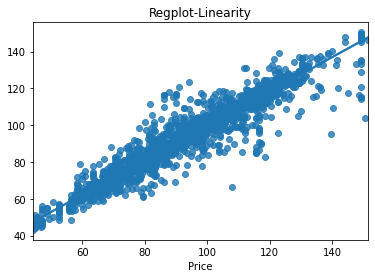

Text(0.5, 1.0, 'Regplot-Homoscadacity')

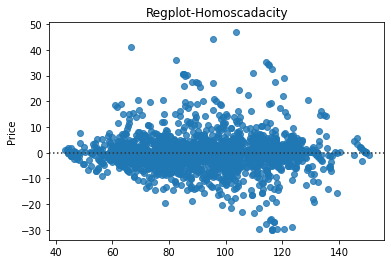

Text(0.5, 1.0, 'Ditribution')

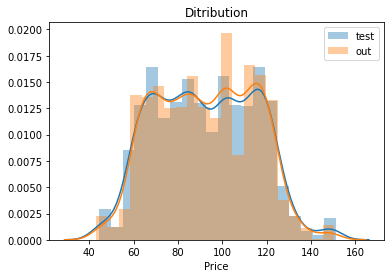

In [72]:
## visuals
#plt.figure(figsize=(3,2),dpi=200)
sb.regplot(ytest,y_test_predxgb)
plt.title('Regplot-Linearity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.residplot(y_test_predxgb,ytest-y_test_predxgb)
plt.title('Regplot-Homoscadacity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.distplot(ytest,label='test')
sb.distplot(y_test_predxgb,label='out')
plt.legend()
plt.title('Ditribution')

In [73]:

'''#comment to run
params = {'max_depth': [5,10,15,20,25], 
                'learning_rate': [0.01, 0.05, 0.1], 
                'n_estimators': [50,100, 200, 300, 400], 
                'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
                }
xgbr=XGBRegressor()
model = RandomizedSearchCV(xgbr, params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5)

rsv_XGB=model.fit(xtrain, ytrain)

#save model
file=open("flight_XGB_RSCV.pkl","wb")
pickle.dump(model,file)
'''#comment 
model=open("flight_XGB_RSCV.pkl","rb")
rsv_XGB=pickle.load(model)

'#comment to run\nparams = {\'max_depth\': [5,10,15,20,25], \n                \'learning_rate\': [0.01, 0.05, 0.1], \n                \'n_estimators\': [50,100, 200, 300, 400], \n                \'reg_lambda\': [0.001, 0.1, 1.0, 10.0, 100.0]\n                }\nxgbr=XGBRegressor()\nmodel = RandomizedSearchCV(xgbr, params, n_iter=20, scoring = \'neg_mean_absolute_error\', cv=5)\n\nrsv_XGB=model.fit(xtrain, ytrain)\n\n#save model\nfile=open("flight_XGB_RSCV.pkl","wb")\npickle.dump(model,file)\n'

In [74]:

y_train_predxgb = rsv_XGB.predict(xtrain)
y_test_predxgb = rsv_XGB.predict(xtest)


In [75]:
rsv_XGB.best_estimator_
rsv_XGB.best_params_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

{'reg_lambda': 0.1, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1}

In [76]:
# Metrics
#'''
print("RAndomizedGridSearchCV XGB Regressor Model:")
print(50 * '-') 
mse=mean_squared_error(ytest, y_test_predxgb)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytest, y_test_predxgb))
print("\nRAndomizedGridSearchCV XGB Regressor Model:on train data")
print(50 * '-')
mse=mean_squared_error(ytrain, y_train_predxgb)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytrain, y_train_predxgb))

RAndomizedGridSearchCV XGB Regressor Model:
--------------------------------------------------
RMSE:  5.9679783670454905
MSE:  35.61676578952296
R-squared:  0.9295977112875042

RAndomizedGridSearchCV XGB Regressor Model:on train data
--------------------------------------------------
RMSE:  1.1762695852386986
MSE:  1.3836101371576202
R-squared:  0.9972585669999519


Text(0.5, 1.0, 'Regplot-Linearity')

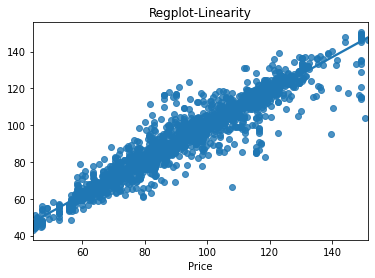

Text(0.5, 1.0, 'Regplot-Homoscadacity')

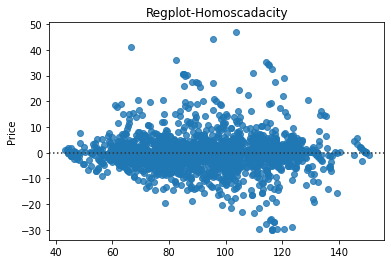

Text(0.5, 1.0, 'Ditribution')

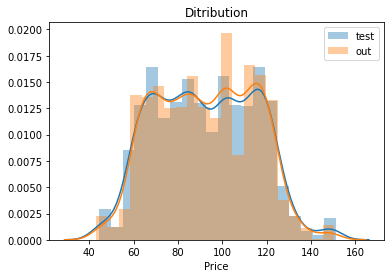

In [77]:
## visuals
#plt.figure(figsize=(3,2),dpi=200)
sb.regplot(ytest,y_test_predxgb)
plt.title('Regplot-Linearity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.residplot(y_test_predxgb,ytest-y_test_predxgb)
plt.title('Regplot-Homoscadacity')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.distplot(ytest,label='test')
sb.distplot(y_test_predxgb,label='out')
plt.legend()
plt.title('Ditribution')

In [78]:
#prepare Test data
test_x.head(2)

,Departure Time,Arrival Time,Journey Time,Stops,Flight count,Flight Distance(km),Month,Day,Day_name,Extra Info,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Dest_Chennai:Kolkata,Source_Dest_Delhi:Cochin,Source_Dest_Kolkata:Banglore,Source_Dest_Mumbai:Hyderabad,Airline_Trujet,Airline_Vistara Premium economy
0,20,21,740.00,1,71,"1,511.34",9,5,4,5,...,0,0,0,0,0,0,1,0,0.00,0.00
1,20,23,165.00,0,36,"1,709.71",4,15,1,5,...,0,0,0,0,0,0,0,0,0.00,0.00


## Final RF model with out not transformed

In [186]:
#verify model again on untransformed output variable
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=45)

In [195]:
#final prediction model verification on untransformed
rf_reg=RandomForestRegressor(n_estimators=500,
                             criterion='mse',
                             min_samples_leaf=1,
                             max_samples=.7,
                             min_samples_split=2,
                             max_depth=26,
                             random_state=45,
                            verbose=1)
rf_reg.fit(xtrain,ytrain)

ypred = rf_reg.predict(xtest)
y_tr_pred =rf_reg.predict(xtrain)
#keeping output as it is to have explainability

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.2s finished


RandomForestRegressor(max_depth=26, max_samples=0.7, n_estimators=500,
                      random_state=45, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


## Final XGBR model with out not transformed

In [79]:
#slightly modified best fit values to avoid overfitting and keep variability little higher
xgbr_final_v1=XGBRegressor(reg_lambda= 1.0, base_score=0.5,n_estimators=120, max_depth= 13,
                           learning_rate= 0.1, booster='gbtree', 
                           tree_method='exact',random_state=50)

xgbr_final_v1.fit(xtrain,ytrain)
#ytest=np.power(ytest,2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=13,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=0, num_parallel_tree=1, random_state=50,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
ypred_xgb = xgbr_final_v1.predict(xtest)
y_tr_pred_xgb =xgbr_final_v1.predict(xtrain)

## Metrics comapring final models

In [81]:
#'''
print("Final Random Forest Regressor Model:")
print(50 * '-')
mse=mean_squared_error(ytest, ypred)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytest, ypred))
print("\nFinal Random Forest Regressor Model:on train data")
print(50 * '-')
mse=mean_squared_error(ytrain, y_tr_pred)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytrain, y_tr_pred))

print("Final XGB Regressor Model verification:")
print(50 * '-') 
mse=mean_squared_error(ytest, ypred_xgb)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytest, ypred_xgb))
print("\nFinal XGB Regressor Model verification:on train data")
print(50 * '-')
mse=mean_squared_error(ytrain, y_tr_pred_xgb)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(ytrain, y_tr_pred_xgb))

Final Random Forest Regressor Model:
--------------------------------------------------
RMSE:  12.260460945257899
MSE:  150.31890259019423
R-squared:  0.6992464159578144

Final Random Forest Regressor Model:on train data
--------------------------------------------------


NameError: name 'y_tr_pred' is not defined

In [84]:
'''#comment to run
#save model and reuse when required
file=open("flight_RF_pred.pkl","wb")
pickle.dump(rf_reg,file)
model=open("flight_RF_pred.pkl","rb")
rf_model=pickle.load(model)
ypred=rf_model.predict(xtest)
y_train_pred=rf_model.predict(xtrain)
#verify results
print('R2 = ',r2_score(ytest,ypred))
print('RMSE = ',mean_squared_error(ytest,ypred))
print('MSE = ',np.sqrt(mse))
print('TRAIN')
r2_score(ytest,ypred)
mean_squared_error(ytest,ypred)
np.sqrt(mse)
'''#comment to run

'#comment to run\n#save model and reuse when required\nfile=open("flight_RF_pred.pkl","wb")\npickle.dump(rf_reg,file)\nmodel=open("flight_RF_pred.pkl","rb")\nrf_model=pickle.load(model)\nypred=rf_model.predict(xtest)\ny_train_pred=rf_model.predict(xtrain)\n#verify results\nprint(\'R2 = \',r2_score(ytest,ypred))\nprint(\'RMSE = \',mean_squared_error(ytest,ypred))\nprint(\'MSE = \',np.sqrt(mse))\nprint(\'TRAIN\')\nr2_score(ytest,ypred)\nmean_squared_error(ytest,ypred)\nnp.sqrt(mse)\n'

#### RF is better when output not transformed
<br> **-------------------------------**
<br>***GOOD TO GO***
<br>**-------------------------------**

# Final prediction for TEST data - Random Forest
Params : (n_estimators=300,
                             criterion='mse',
                             min_samples_leaf=3,
                             max_samples=.7,
                             min_samples_split=8,
                             max_depth=26,
                             random_state=45,
                            verbose=1)

In [197]:
#RF
rf_reg=RandomForestRegressor(n_estimators=500,
                             criterion='mse',
                             min_samples_leaf=1,
                             max_samples=.7,
                             min_samples_split=3,
                             max_depth=26,
                             random_state=45,
                            verbose=1)
#inp is all input variables in TRAIN data set and out is output(Price') in TRAIN data
#final pred model has to be trained on this dataset and then use it to predict fare in TEST data 

rf_reg.fit(inp,out)
y_testpred = rf_reg.predict(test_x)
y_trainpred = rf_reg.predict(inp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.1s finished


RandomForestRegressor(max_depth=26, max_samples=0.7, min_samples_split=3,
                      n_estimators=500, random_state=45, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished


In [198]:
#save model
file=open("RF_flight_final.pkl","wb")
pickle.dump(rf_reg,file)


In [87]:
#transform predicted output if out_sqrt used
#y_testpred = np.power(y_testpred,2).round().astype(int)

In [116]:
out

0        3897
1        7662
2       13882
3        6218
4       13302
        ...  
8994     6827
8995     3100
8996     2759
8997    11753
8998    12648
Name: Price, Length: 8999, dtype: int64

In [199]:
#create DF of output

final_output = pd.DataFrame(data=y_testpred,columns=['Price_pred RF'])
final_output_train = pd.DataFrame([out]).T.rename(columns={'Price':'Price_ori'})
final_output_train['Price_pred RF']=y_trainpred



Final Random Forest Regressor Model:on TRAIN data
--------------------------------------------------
RMSE:  632.0081492164817
MSE:  399434.30067604256
R-squared:  0.9777722707622062


Text(0.5, 1.0, 'Regplot-Linearity-Final RF Model-TRAIN output')

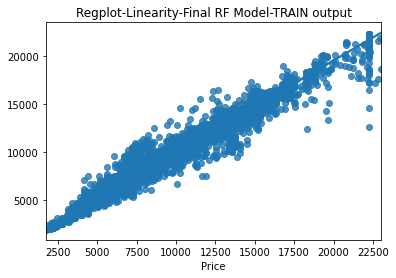

Text(0.5, 1.0, 'Regplot-Homoscadacity-Final RF Model-TRAIN ouput')

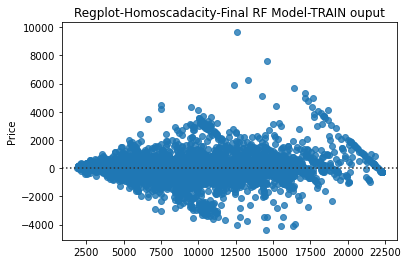

Text(0.5, 1.0, 'Ditribution-Final RF Model-TRAIN output')

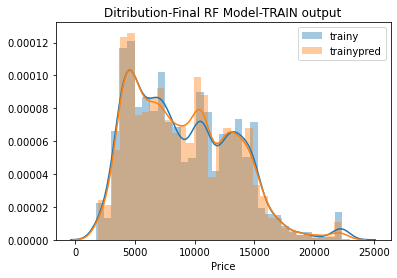

In [200]:
#evaluate results prediction on train data
print("\nFinal Random Forest Regressor Model:on TRAIN data")
print(50 * '-')
mse=mean_squared_error(out, y_trainpred)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(out, y_trainpred))


#visuals
#plt.figure(figsize=(3,2),dpi=200)
sb.regplot(out,y_trainpred)
plt.title('Regplot-Linearity-Final RF Model-TRAIN output')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.residplot(y_trainpred,out-y_trainpred)
plt.title('Regplot-Homoscadacity-Final RF Model-TRAIN ouput')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.distplot(out,label='trainy')
sb.distplot(y_trainpred,label='trainypred')
plt.legend()
plt.title('Ditribution-Final RF Model-TRAIN output')
plt.show()

# Final XGBoost prediction for TEST data
params: {'reg_lambda': 0.1, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1}
<br>best estimator :base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', valiDate_of_Journey_parameters=1, verbosity=None

In [56]:
#xgbr_final=XGBRegressor(rsv_XGB.best_estimator_)
xgbr_final=XGBRegressor(colsample_bylevel=1,
                        importance_type='gain', 
                        max_delta_step=0,  
                        min_child_weight=1, interaction_constraints='', 
                        colsample_bynode=1, colsample_bytree=1, gamma=1,
                        reg_lambda= 2.0, base_score=0.5,n_estimators=225, 
                        max_depth= 20, learning_rate= 0.1, booster='gbtree', 
                        tree_method='exact',random_state=50,
                       num_parallel_tree=1, reg_alpha=0,
                       scale_pos_weight=1, subsample=1)

In [83]:
#make columns in same order for xgbr
test_x1=test_x[inp.columns]#['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Flight count', 'Flight Distance(km)', 'Month', 'Day', 'Day_name', 'Additional_Info', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Dest_Chennai:Kolkata', 'Source_Dest_Delhi:Cochin', 'Source_Dest_Kolkata:Banglore', 'Source_Dest_Mumbai:Hyderabad']]

In [92]:
#verify model again on untransformed output variable
#xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=45)


In [58]:
#final prediction of TEST data
xgbr_final.fit(inp.drop(['Additional_Info'],1),out)
y_testpredxgbr = xgbr_final.predict(test_x.drop(['Additional_Info'],1))
y_trainpredxgbr = xgbr_final.predict(inp.drop(['Additional_Info'],1))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=225, n_jobs=0, num_parallel_tree=1, random_state=50,
             reg_alpha=0, reg_lambda=2.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
final_output_train['Price_pred XGBR']=y_trainpredxgbr
final_output ['Price_pred XGBR'] =y_testpredxgbr

NameError: name 'final_output_train' is not defined

In [59]:
#evaluate results prediction on train data
print("\nFinalXGB Regressor Model:on TRAIN data")
print(50 * '-')
mse=mean_squared_error(out, y_trainpredxgbr)
print("RMSE: ", np.sqrt(mse))
print("MSE: ", mse)
print("R-squared: ", r2_score(out, y_trainpredxgbr))


#visuals
#plt.figure(figsize=(3,2),dpi=200)
sb.regplot(out,y_trainpredxgbr)
plt.title('Regplot-Linearity-Final XGBR Model-TRAIN output')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.residplot(y_trainpredxgbr,out-y_trainpredxgbr)
plt.title('Regplot-Homoscadacity-Final XGBR Model-TRAIN ouput')
plt.show()
#plt.figure(figsize=(3,2),dpi=200)
sb.distplot(out,label='trainy')
sb.distplot(y_trainpredxgbr,label='trainypred')
plt.legend()
plt.title('Ditribution-Final XGBR Model-TRAIN output')
plt.show()


FinalXGB Regressor Model:on TRAIN data
--------------------------------------------------


NameError: name 'mean_squared_error' is not defined

In [60]:
#Output predicted comparision of results
final_output = pd.DataFrame(data=y_testpredxgbr,columns=['Price'])
final_output.to_excel('Price_out_23_oct.xlsx')
final_output.describe()
out.describe()

,Price
count,"2,671.00"
mean,"9,101.29"
std,"4,188.03"
min,"1,793.02"
25%,"5,465.49"
50%,"8,633.11"
75%,"12,321.54"
max,"23,463.89"


count              10,683.00
mean                9,015.33
std                 4,239.31
min                 1,759.00
25%                 5,277.00
50%                 8,372.00
75%                12,373.00
max                23,001.00
Name: Price, dtype: float64

# Final Results

Both models appear to be similar. and captured variation well. RF model has high R2. XGBR has captured standard deviation in output well in results(predicted values) There could be chance of overfitting  because of including calculated additional features

# Discussion
Various factors affect flight fare and and Airlines use dynamic and well kept pricing algorithms and models.
Predicting flight fare is great area of research in understanding how airlines apply charges on air ticket.

<br>
Various other factors affect price like fuel price, rush hour, if source destination connect to international flights demand will be more.
Holidays (national). Since, the current data set is of Indian domestic flights both national and regional festivals play a role in demand.
Holidays for school and colleges will too have an impact on determining peak time.
<br> Number of days to journey i.e Date_of_Journey of ticket booking is known to have major role in determining flight fare.

<br>adding holiday Date_of_Journey information to data might significantly improve performance.
<br>Apart from these class of travel, in-flight facilities and services also paly a role. 


### Note
1. When there is new data, from that unique flights to be added to flight count of that day
2. Unique routemaps that are not in present data set need to be verified to claculate distance
3. These 2 processes can be automated

### References
1. ML class notebooks and resources
2. Kaggle resources
3. Github resources
4. Stackoverflow
5. https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2264-5
6. Medium/ Towardsdatascience blogs

# *******************
# *******END*********
# *******************